## PROJECT_TEAM_ID:- PTID-CDS-SEP-24-2092
## PROJECT_REFERENCE_CODE:- PM-PR-0015
## DATA SCIENCE CLIENT PROJECT ON BANK GOOD CREDIT

## Business case

## TASK :- CLASSIFICTION TASK

## Domain Analysis

## PROJECT GOAL

#### Build a model with the data provided

1) Data exploration insights – what did we find and what decision we took?
2) Feature matrix - List of features selected with gain
3) Model evaluation - Gini and rank ordering

#### Project is Divided into certain steps

1) Fetching data from data-base.
2) Domain analysis.
3) EDA: [Univariate, Bivariate & Multivariate analysis condition]
4) Data preprocessing/Feature Engineering.
5) Feature selection.
6) Model creation.
7) Model Evaluation.
8) Model Saving

## IMPORTING LIBRARIES

In [1]:
!pip install mysql.connector

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import mysql.connector
import os
import warnings
warnings.filterwarnings('ignore')

## CONNECTION TO SERVER

In [2]:
#make connection to mysql database server.
connection = mysql.connector.connect(host ='18.136.157.135',
                                    port = 3306,
                                    user ='dm_team1',
                                    password ='DM!$Team&279@20!',
                                    database ='project_banking')
connection

##### the above code establish connection with mysql database server where host is  '18.136.157.135',port is 3306,username is 'dm_team1',password is 'DM!$Team&279@20!' and database is 'project_banking'. 

In [3]:
show_tables=pd.read_sql_query('show tables',connection)
print(show_tables)

  Tables_in_project_banking
0              Cust_Account
1         Cust_Demographics
2              Cust_Enquiry


##### The line of code show_tables=pd.read_sql_query('show tables',connection) uses the Pandas library to run a command on the database. The command 'show tables' asks the database to list all the tables it has. The results of this command are then saved in the variable show_tables. 
##### Three tables available in  'project_banking' database.
##### 1) Cust_Account
##### 2) Cust_Demographics
##### 3) Cust_Enquiry

## FETCHING DATA FROM THE DATABASE 
#### 1. Customer Account Data (Table : Cust_Account)
This table contains customer’s historical accounts data and payments history

In [4]:
query='select*from Cust_Account'
data1=pd.read_sql(query,connection)
pd.set_option('display.max_columns',None)
data1.head()

dt_opened customer_no  upload_dt acct_type owner_indic  opened_dt  \
0  10-Nov-15       12265  20-Oct-15         6           1  09-Jun-13   
1  10-Nov-15       12265  20-Oct-15        10           1  25-May-12   
2  10-Nov-15       12265  20-Oct-15        10           1  22-Mar-12   
3  20-Jul-15       15606  09-Jul-15        10           1  13-Jan-06   
4  20-Jul-15       15606  09-Jul-15         6           1  18-Jan-15   

  last_paymt_dt  closed_dt reporting_dt high_credit_amt cur_balance_amt  \
0     30-Jun-14  05-Jul-14    30-Sep-15           20900               0   
1     06-Sep-15               03-Oct-15           16201           10390   
2     31-Aug-15               30-Sep-15           41028           34420   
3                26-Jul-07    31-Jan-09           93473               0   
4     05-May-15               31-May-15           20250           13500   

  amt_past_due                                    paymenthistory1  \
0               """STDSTDSTDXXXXXXXXXXXXXXXSTDXXXXXXXXXXXXXXXS...   
1               """0000000000000000000000000000000000000000000...   
2               """0000000000000000000000000000000000000000000...   
3               """1200900600600600300000000000000000000000000...   
4                                           """000000000000000"""   

                                     paymenthistory2 paymt_str_dt  \
0                                                       01-Sep-15   
1  """000000000000000000000000000XXX0000000000000...    01-Oct-15   
2  """0000000000000000000000000000000000000000000...    01-Sep-15   
3                                                       01-Jul-07   
4                                                       01-May-15   

  paymt_end_dt creditlimit cashlimit rateofinterest paymentfrequency  \
0    01-Jul-14                                                         
1    01-Nov-12       14000      1400                               3   
2    01-Oct-12                                                         
3    01-Feb-06                                                         
4    01-Jan-15                                                         

  actualpaymentamount  
0                      
1                5603  
2                      
3                      
4

##### 1. Executes an SQL query to retrieve all columns from the Cust_Account table: This part runs an SQL command to get all the data from the Cust_Account table in the database.

##### 2. Stores the query result in a Pandas DataFrame named data1: The data fetched from the database is saved into a Pandas DataFrame called data1.

##### 3.Adjusts Pandas options to display all columns when printing: This step ensures that when you print the DataFrame, all of its columns will be shown, not just a limited number.

##### 4.Displays the first few rows of the DataFrame.

In [5]:
data1.shape

(186329, 21)

##### Prints the shape (rows and columns) of the DataFrame: The shape of the DataFrame tells you how many rows and columns it has.

In [6]:
customer_acc_columns = ['customer_no','high_credit_amt','cur_balance_amt','amt_past_due','cashlimit','creditlimit']
data_cust_acc = data1.loc[:,customer_acc_columns]
data_cust_acc.head()

customer_no high_credit_amt cur_balance_amt amt_past_due cashlimit  \
0       12265           20900               0                          
1       12265           16201           10390                   1400   
2       12265           41028           34420                          
3       15606           93473               0                          
4       15606           20250           13500                          

  creditlimit  
0              
1       14000  
2              
3              
4

##### The above code extracts specific columns ('customer_no', 'high_credit_amt', 'cur_balance_amt', 'amt_past_due', 'cashlimit', 'creditlimit') from the original DataFrame (data1) and stores them in a new DataFrame (data_cust_acc). 

In [7]:
acc_data= pd.DataFrame(data_cust_acc.groupby(['customer_no']).sum()).reset_index()

##### This line of code groups the data in the data_cust_acc DataFrame by the 'customer_no' column and calculates the sum of each numerical column within each group.

In [8]:
acc_data

customer_no                                    high_credit_amt  \
0               1  2528846125459139765171256290596200000020000009...   
1              10  1111113565675230005500000531458600000111851500...   
2             100      747754333541229800010000454945000034240350000   
3            1000                                 548289548289147688   
4           10000                   52590480000562501997410200520000   
...           ...                                                ...   
23891        9995                        124964496733869524900038822   
23892        9996                               44000977215000031516   
23893        9997                         22990100000175409959090000   
23894        9998                                    407621558523169   
23895        9999                15275437582300022500441317500019718   

                                      cur_balance_amt amt_past_due  \
0      2528846588820003759832549017546780000093630000  25288469363   
1                               068994000178725000000                
2                           3970033460980316015530000                
3                                         31349029113                
4                     1752758222031250-26123003454770                
...                                               ...          ...   
23891                     117236492223702016887613554                
23892                             4400033111263042843                
23893                                        00095830                
23894                                 386371389419983                
23895                   089100991511500014749-27219-1                

        cashlimit      creditlimit  
0          168000     250000420000  
1          243000           405000  
2       980017700  300009800059000  
3      6750081000     225000270000  
4           10000            60000  
...           ...              ...  
23891        9800       4900038800  
23892       13000            65000  
23893                               
23894        4100       4100015000  
23895       10000  250002500052000  

[23896 rows x 6 columns]

In [9]:
acc_data.to_csv('Cust_Account_data.csv',index=False)
print(acc_data.shape)

(23896, 6)


##### The line acc_data.to_csv( ) saves the data in the acc_data Dataframe to a CSV file called 'Cust_Account_data.csv'. The to_csv function in Pandas is used to export the data into a CSV file format.

##### The index=False part tells Pandas not to add the row numbers (index) as an extra column in the CSV file. So, the CSV will only have the data from the Dataframe without a column for the row numbers.
##### Prints the shape (rows and columns) of the DataFrame: The shape of the DataFrame tells you how many rows and columns it has.

#### 2. Customer Enquiry Data (Table : Cust_Enquiry)
This table contains customer’s historical enquiry data such as enquiry amount and enquiry purpose.

In [10]:
query='select * from Cust_Enquiry'
data2=pd.read_sql(query,connection)
pd.set_option('display.max_columns',None)
print(data2)

        dt_opened customer_no  upload_dt enquiry_dt enq_purpose  enq_amt
0       18-Apr-15           1  21-Apr-15  19-Dec-14           2  3500000
1       18-Apr-15           1  21-Apr-15  05-Mar-14           5   500000
2       18-Apr-15           1  21-Apr-15  05-Mar-14           0    50000
3       18-Apr-15           1  21-Apr-15  22-Feb-14          10    50000
4       18-Apr-15           1  21-Apr-15  11-Jun-13          10     1000
...           ...         ...        ...        ...         ...      ...
413183  04-Dec-15       23896  09-Nov-15  22-Oct-11           5   200000
413184  04-Dec-15       23896  09-Nov-15  06-Jan-11          10    50000
413185  04-Dec-15       23896  09-Nov-15  01-Apr-10          10    50000
413186  04-Dec-15       23896  09-Nov-15  21-Feb-10           1   330000
413187  04-Dec-15       23896  09-Nov-15  17-Oct-07           2   682000

[413188 rows x 6 columns]


##### 1. Executes an SQL query to retrieve all columns from the Cust_Enquiry table: This part runs an SQL command to get all the data from the Cust_Enquiry table in the database.
##### 2. Stores the query result in a Pandas DataFrame named data2: The data fetched from the database is saved into a Pandas DataFrame called data2.
##### 3.Adjusts Pandas options to display all columns when printing: This step ensures that when you print the DataFrame, all of its columns will be shown, not just a limited number.
##### 4.Displays the first few rows of the DataFrame.

In [11]:
data2_columns=['customer_no','enq_amt']
data_cust_enq=data2.loc[:,data2_columns]
print(data_cust_enq)

       customer_no  enq_amt
0                1  3500000
1                1   500000
2                1    50000
3                1    50000
4                1     1000
...            ...      ...
413183       23896   200000
413184       23896    50000
413185       23896    50000
413186       23896   330000
413187       23896   682000

[413188 rows x 2 columns]


##### The above code extracts specific columns ('customer_no','enq_amt') from the original DataFrame (data2) and stores them in a new DataFrame (data_cust_enq).¶

In [12]:
data_cust_enq_count=pd.DataFrame(data_cust_enq.groupby(['customer_no']).count()).reset_index()
data_cust_enq_count.columns=['customer_no','enq_count']
data_cust_enq_count

customer_no  enq_count
0               1         18
1              10         21
2             100         19
3            1000         10
4           10000         14
...           ...        ...
23891        9995         17
23892        9996          8
23893        9997         17
23894        9998          6
23895        9999         14

[23896 rows x 2 columns]

##### This line of code groups the data in the data_cust_enq DataFrame by the 'customer_no' column and calculates the count of enq_amt column within each group.


In [13]:
data_cust_enq_total=pd.DataFrame(data_cust_enq.groupby(['customer_no']).sum()).reset_index()
data_cust_enq_total.columns=['customer_no','enq_sum']
data_cust_enq_total.head()

customer_no                                            enq_sum
0           1  3500000500000500005000010001000100010001000150...
1          10  2000000200000002000000055000005500000100050000...
2         100  5000010000110000130000030000040000010000100001...
3        1000    10000100010000100001000050000500005000010001000
4       10000  9000200002220005000010000050000500005000056250...

##### This line of code groups the data in the data_cust_enq DataFrame by the 'customer_no' column and calculates the sum of enq_amt column within each group.

In [14]:
enq_data=pd.merge(data_cust_enq_count,data_cust_enq_total,on='customer_no',how='inner')

##### This code combines two  DataFrames called data_cust_enq_count,data_cust_enq_total based on a common column  'customer_no' and create new dataframe enq_data.
##### It merges the data using an inner join, meaning only customers who appear in both dataframe (with the same 'customer_no') will be included in the new dataframe. The result will have information about both the total enquiry count and total enquiry amount for each matching customer.

In [15]:
enq_data.head()

customer_no  enq_count                                            enq_sum
0           1         18  3500000500000500005000010001000100010001000150...
1          10         21  2000000200000002000000055000005500000100050000...
2         100         19  5000010000110000130000030000040000010000100001...
3        1000         10    10000100010000100001000050000500005000010001000
4       10000         14  9000200002220005000010000050000500005000056250...

In [16]:
enq_data.to_csv('Cust_Enquiry_Data.csv',index=False)

##### The line enq_data.to_csv( ) saves the data in the enq_data Dataframe to a CSV file called 'Cust_Enquiry_Data.csv'. The to_csv function in Pandas is used to export the data into a CSV file format.
##### The index=False part tells Pandas not to add the row numbers (index) as an extra column in the CSV file. So, the CSV will only have the data from the Dataframe without a column for the row numbers.

In [17]:
enq_data.shape

(23896, 3)

##### Prints the shape (rows and columns) of the DataFrame: The shape of the DataFrame tells you how many rows and columns it has.

#### 3. Demographics Data (Table : Cust_Demographics) 
Current customer applications with demographic data.
Note that demographics features are renamed as features and obscured in accordance with privacy policies.

In [18]:
query='select * from Cust_Demographics'
data3=pd.read_sql(query,connection)
pd.set_option('display.max_columns',None)
data3

dt_opened customer_no entry_time        feature_1  feature_2 feature_3  \
0      18-Apr-15           1  13-Apr-15         Insignia  13-Apr-15       650   
1      21-Apr-15           2  21-Apr-15         Insignia  21-Apr-15       760   
2      22-Apr-15           3  21-Apr-15         Insignia  21-Apr-15       774   
3      25-Apr-15           4  15-Apr-15         Insignia  20-Apr-15       770   
4      06-May-15           5  30-Apr-15         Insignia                        
...          ...         ...        ...              ...        ...       ...   
23891  31-Dec-15       23892  10-Dec-15  Platinum Deligh  10-Dec-15       704   
23892  17-Dec-15       23893  16-Nov-15  Platinum Deligh                        
23893  04-Nov-15       23894  24-Sep-15  Platinum Maxima  24-Sep-15       748   
23894  03-Nov-15       23895  30-Sep-15  Platinum Deligh  30-Sep-15       740   
23895  04-Dec-15       23896  06-Nov-15  Titanium Deligh  06-Nov-15       688   

      feature_4   feature_5 feature_6 feature_7 feature_8 feature_9  \
0             2  Card Setup        14    500000                       
1             1  Card Setup        14   1200000                       
2             1  Card Setup        14    700000                       
3             1  Card Setup        14    500000                       
4             3  Card Setup        14    500000                       
...         ...         ...       ...       ...       ...       ...   
23891         1  Card Setup        14    119000                       
23892         2  Card Setup        14     35000                       
23893         3  Card Setup        14     68000                       
23894         3  Card Setup        14    158000                       
23895         1  Card Setup        14    106000                       

      feature_10 feature_11 feature_12 feature_13 feature_14 feature_15  \
0                         Y        IS1                     0        159   
1                         Y        IS1                     0         91   
2                         Y        IS1                     0         91   
3                         Y        IS1                     0        157   
4                         Y        IS1                     0        100   
...          ...        ...        ...        ...        ...        ...   
23891                     Y        PD1        PD3         12       SA05   
23892                     Y        PD1        PD3         12       SA03   
23893                     Y        PM1                             CD01   
23894                     Y        PD1        PD3         12       SA40   
23895                     Y        TD1                     0       SA03   

      feature_16 feature_17 feature_18 feature_19  feature_20 feature_21  \
0           4284       4284                     1  ADFPNXXXXX  03-Sep-65   
1           B001       4077                     1  AJWPRXXXXX  14-Jul-62   
2           B001       4077                     2  AFAPNXXXXX  10-Apr-66   
3           5107       5107                     1  AAAPDXXXXX  16-Apr-64   
4           D016       4564                     1  ABEPSXXXXX  03-Jan-54   
...          ...        ...        ...        ...         ...        ...   
23891       MA01                                1  CUQPSXXXXX  12-Oct-88   
23892       AS33                                1  DTPPSXXXXX  01-Feb-87   
23893       D066                                1  CPOPSXXXXX  08-Nov-86   
23894       G011                                1  AVZPGXXXXX  24-Nov-82   
23895       AS33                                1  AJIPBXXXXX  15-Aug-83   

       feature_22 feature_23         feature_24 feature_25 feature_26  \
0      98332XXXXX          N    @REDIFFMAIL.COM          1          2   
1      99455XXXXX          N         @GMAIL.COM          1          2   
2      98456XXXXX          N  @SHOBANARAYAN.COM          1          0   
3      98220XXXXX          N          @VSNL.COM          1          3   
4 

##### 1. Executes an SQL query to retrieve all columns from the Cust_Demographics table: This part runs an SQL command to get all the data from the Cust_Enquiry table in the database.
##### 2. Stores the query result in a Pandas DataFrame named data3: The data fetched from the database is saved into a Pandas DataFrame called data3.
##### 3.Adjusts Pandas options to display all columns when printing: This step ensures that when you print the DataFrame, all of its columns will be shown, not just a limited number.
##### 4.Displays the first few rows of the DataFrame.

In [19]:
demo_data=pd.DataFrame(data3)
print(demo_data.shape)
demo_data.head()

(23896, 83)


dt_opened customer_no entry_time feature_1  feature_2 feature_3 feature_4  \
0  18-Apr-15           1  13-Apr-15  Insignia  13-Apr-15       650         2   
1  21-Apr-15           2  21-Apr-15  Insignia  21-Apr-15       760         1   
2  22-Apr-15           3  21-Apr-15  Insignia  21-Apr-15       774         1   
3  25-Apr-15           4  15-Apr-15  Insignia  20-Apr-15       770         1   
4  06-May-15           5  30-Apr-15  Insignia                              3   

    feature_5 feature_6 feature_7 feature_8 feature_9 feature_10 feature_11  \
0  Card Setup        14    500000                                         Y   
1  Card Setup        14   1200000                                         Y   
2  Card Setup        14    700000                                         Y   
3  Card Setup        14    500000                                         Y   
4  Card Setup        14    500000                                         Y   

  feature_12 feature_13 feature_14 feature_15 feature_16 feature_17  \
0        IS1                     0        159       4284       4284   
1        IS1                     0         91       B001       4077   
2        IS1                     0         91       B001       4077   
3        IS1                     0        157       5107       5107   
4        IS1                     0        100       D016       4564   

  feature_18 feature_19  feature_20 feature_21  feature_22 feature_23  \
0                     1  ADFPNXXXXX  03-Sep-65  98332XXXXX          N   
1                     1  AJWPRXXXXX  14-Jul-62  99455XXXXX          N   
2                     2  AFAPNXXXXX  10-Apr-66  98456XXXXX          N   
3                     1  AAAPDXXXXX  16-Apr-64  98220XXXXX          N   
4                     1  ABEPSXXXXX  03-Jan-54  98111XXXXX          N   

          feature_24 feature_25 feature_26 feature_27  \
0    @REDIFFMAIL.COM          1          2              
1         @GMAIL.COM          1          2              
2  @SHOBANARAYAN.COM          1          0              
3          @VSNL.COM          1          3              
4    @REDIFFMAIL.COM          1          3              

                     feature_28 feature_29 feature_30 feature_31 feature_32  \
0  Mumbai / Navi Mumbai / Thane     400610       1965          0       Self   
1                     Bengaluru     560042       1969          0       Self   
2                     Bengaluru     560042       1966          0       Self   
3                          Pune     411001       1988          0       Self   
4                       Gurgaon     122009       1995          0       Self   

  feature_33 feature_34 feature_35 feature_36 feature_37 feature_38  \
0          Y          2      90000                                    
1          Y          2          1                                    
2          Y          2          1                                    
3          Y          2     100000                                    
4          Y          2     300000                                    

  feature_39 feature_40 feature_41 feature_42 feature_43 feature_44  \
0          0          0          0          0     Mumbai     400059   
1          0          0          0          0  Bangalore     560042   
2          0          0          0          0  Bangalore     560042   
3          0          0          0          0       Pune     411026   
4          0          0          0          0    Gurgaon     122009   

        feature_45 feature_46  feature_47              feature_48 feature_49  \
0  @CODOGNOTTO.NET   PAN Card  ADFPNXXXXX  The Ratnakar Bank Ltd.              
1                    PAN Card  AJWPRXXXXX  The Ratnakar Bank Ltd.              
2                    PAN Card  AFAPNXXXXX                                      
3       @ALBAJ.COM   PAN Card  AAAPDXXXXX  The Ratnakar Bank Ltd.              
4                    PAN Card  ABEPSXXXXX  The Ratnakar Bank Ltd.              

  feature_50           featu

##### The code makes a copy of the 'Cust_Demographics' data and stores it in a DataFrame called demo_data. After that, it prints the shape of the demo_data dataframe, which shows how many rows and columns it has. 

In [20]:
demo_data.to_csv('Cust_ Demographics_data.csv',index=False)

##### The line demo_data.to_csv( ) saves the data in the demo_data Dataframe to a CSV file called 'Cust_ Demographics_data.csv'. The to_csv function in Pandas is used to export the data into a CSV file format.
##### The index=False part tells Pandas not to add the row numbers (index) as an extra column in the CSV file. So, the CSV will only have the data from the Dataframe without a column for the row numbers.

In [21]:
print(acc_data.shape)
print(demo_data.shape)
print(enq_data.shape)

(23896, 6)
(23896, 83)
(23896, 3)


##### These lines of code give us details about the size of each of the three tables (DataFrames): acc_data, demo_data, and enq_data. Specifically, they show how many rows and columns are in each table. This helps us understand the structure and size of the data we are working with.

In [22]:
merge_data=pd.merge(acc_data,demo_data,on='customer_no',how='inner')
print(merge_data.shape)
merge_data.head()

(23896, 88)


customer_no                                    high_credit_amt  \
0           1  2528846125459139765171256290596200000020000009...   
1          10  1111113565675230005500000531458600000111851500...   
2         100      747754333541229800010000454945000034240350000   
3        1000                                 548289548289147688   
4       10000                   52590480000562501997410200520000   

                                  cur_balance_amt amt_past_due   cashlimit  \
0  2528846588820003759832549017546780000093630000  25288469363      168000   
1                           068994000178725000000                   243000   
2                       3970033460980316015530000                980017700   
3                                     31349029113               6750081000   
4                 1752758222031250-26123003454770                    10000   

       creditlimit  dt_opened entry_time        feature_1  feature_2  \
0     250000420000  18-Apr-15  13-Apr-15         Insignia  13-Apr-15   
1           405000  30-May-15  27-May-15         Insignia  27-May-15   
2  300009800059000  24-Apr-15  13-Apr-15  Titanium Deligh  13-Apr-15   
3     225000270000  28-May-15  08-May-15  Titanium Deligh  08-May-15   
4            60000  30-Sep-15  10-Sep-15  Platinum Maxima  10-Sep-15   

  feature_3 feature_4   feature_5 feature_6 feature_7 feature_8 feature_9  \
0       650         2  Card Setup        14    500000                       
1       784         1  Card Setup        14   1017000                       
2       780         3  Card Setup        14    137000                       
3       780         3  Card Setup        14    293000                       
4       700         3  Card Setup        14    145000                       

  feature_10 feature_11 feature_12 feature_13 feature_14 feature_15  \
0                     Y        IS1                     0        159   
1                     Y        IS2                     0         88   
2                     Y        TD1        TD3         12       SA03   
3                     Y        TD1        TD3         12       SA03   
4                     Y        PM1                             SA03   

  feature_16 feature_17 feature_18 feature_19  feature_20 feature_21  \
0       4284       4284                     1  ADFPNXXXXX  03-Sep-65   
1       5785       5785                     1  AAFPDXXXXX  09-Oct-69   
2       AS11                                1  BIAPSXXXXX  30-Jun-83   
3       AS11                                1  CGSPSXXXXX  01-Jan-72   
4       AS32                                1  DFIPKXXXXX  12-May-89   

   feature_22 feature_23       feature_24 feature_25 feature_26  \
0  98332XXXXX          N  @REDIFFMAIL.COM          1          2   
1  98100XXXXX          N                           1          3   
2  97186XXXXX          N       @GMAIL.COM          1          2   
3  99113XXXXX          N  @REDIFFMAIL.COM          1          3   
4  99109XXXXX          N       @GMAIL.COM          1          0   

      feature_27                    feature_28 feature_29 feature_30  \
0                 Mumbai / Navi Mumbai / Thane     400610       1965   
1                                      Gurgaon     122011       1969   
2  Post-Graduate                     New Delhi     110071       1995   
3  Post-Graduate                       Gurgaon     122001       2011   
4       Graduate                     New Delhi     110037       2006   

  feature_31 feature_32 feature_33 feature_34 feature_35        feature_36  \
0          0       Self          Y          2      90000                     
1          0       Self          Y          2          1                     
2          0       Self          Y          1      40000  Private Ltd. Co.   
3          0      Rente          N          1      40000  Private Ltd. Co.   
4          1      Rente          N          2          1                     

                   feature_37     feature_38 feature_39 feature

##### Here we combine two dataframe acc_data & demo data based on customer_no column. The merge is performed as an inner join, ensuring that only customers with matching 'customer_no' values in both DataFrames are included in the result.

In [24]:
final_data=pd.concat([merge_data,enq_data],axis=1)
final_data.shape

(23896, 91)

##### pd.concat()-Pandas concat function use to combine the two DataFrames, data_merge and enq_data.
##### axis=1 This parameter specifies that the concatenation should be done along the columns (horizontally).

In [25]:
final_data.to_csv('Bank_GoodCredit_data.csv')

##### This code saves the combined data from the data_final dataframe to 'Bank_GoodCredit_data.csv'. This is helpful because it allows you to store the merged data in a simple format that can easily be shared, analyzed, or used in other applications.

### BASIC CHECK/DATA READING

In [26]:
data=pd.read_csv('Bank_GoodCredit_data.csv')
#fetch data from csv file.
pd.set_option('display.max_columns',None)
# it means that Pandas will display all columns, regardless of how many there are in the DataFrame.This can be useful when we have a DataFrame with many columns, and we want to see all of them in the output for inspection or analysis.

In [27]:
data.shape
#Prints the shape (rows and columns) of the DataFrame: The shape of the DataFrame tells you how many rows and columns it has.

(23896, 92)

In [28]:
data.head()
# fetch top 5 records from dataframe.

Unnamed: 0  customer_no                                    high_credit_amt  \
0           0            1  2528846125459139765171256290596200000020000009...   
1           1           10  1111113565675230005500000531458600000111851500...   
2           2          100      747754333541229800010000454945000034240350000   
3           3         1000                                 548289548289147688   
4           4        10000                   52590480000562501997410200520000   

                                  cur_balance_amt  amt_past_due   cashlimit  \
0  2528846588820003759832549017546780000093630000  2.528847e+10      168000   
1                           068994000178725000000           NaN      243000   
2                       3970033460980316015530000           NaN   980017700   
3                                     31349029113           NaN  6750081000   
4                 1752758222031250-26123003454770           NaN       10000   

       creditlimit  dt_opened entry_time        feature_1  feature_2  \
0     250000420000  18-Apr-15  13-Apr-15         Insignia  13-Apr-15   
1           405000  30-May-15  27-May-15         Insignia  27-May-15   
2  300009800059000  24-Apr-15  13-Apr-15  Titanium Deligh  13-Apr-15   
3     225000270000  28-May-15  08-May-15  Titanium Deligh  08-May-15   
4            60000  30-Sep-15  10-Sep-15  Platinum Maxima  10-Sep-15   

   feature_3  feature_4   feature_5  feature_6  feature_7 feature_8 feature_9  \
0      650.0        2.0  Card Setup       14.0   500000.0       NaN       NaN   
1      784.0        1.0  Card Setup       14.0  1017000.0       NaN       NaN   
2      780.0        3.0  Card Setup       14.0   137000.0       NaN       NaN   
3      780.0        3.0  Card Setup       14.0   293000.0       NaN       NaN   
4      700.0        3.0  Card Setup       14.0   145000.0       NaN       NaN   

  feature_10 feature_11 feature_12 feature_13  feature_14 feature_15  \
0        NaN          Y        IS1        NaN         0.0        159   
1        NaN          Y        IS2        NaN         0.0         88   
2        NaN          Y        TD1        TD3        12.0       SA03   
3        NaN          Y        TD1        TD3        12.0       SA03   
4        NaN          Y        PM1        NaN         NaN       SA03   

  feature_16 feature_17 feature_18  feature_19  feature_20 feature_21  \
0       4284       4284        NaN         1.0  ADFPNXXXXX  03-Sep-65   
1       5785       5785        NaN         1.0  AAFPDXXXXX  09-Oct-69   
2       AS11        NaN        NaN         1.0  BIAPSXXXXX  30-Jun-83   
3       AS11        NaN        NaN         1.0  CGSPSXXXXX  01-Jan-72   
4       AS32        NaN        NaN         1.0  DFIPKXXXXX  12-May-89   

   feature_22 feature_23       feature_24  feature_25  feature_26  \
0  98332XXXXX          N  @REDIFFMAIL.COM         1.0         2.0   
1  98100XXXXX          N              NaN         1.0         3.0   
2  97186XXXXX          N       @GMAIL.COM         1.0         2.0   
3  99113XXXXX          N  @REDIFFMAIL.COM         1.0         3.0   
4  99109XXXXX          N       @GMAIL.COM         1.0         0.0   

      feature_27                    feature_28  feature_29  feature_30  \
0            NaN  Mumbai / Navi Mumbai / Thane    400610.0      1965.0   
1            NaN                       Gurgaon    122011.0      1969.0   
2  Post-Graduate                     New Delhi    110071.0      1995.0   
3  Post-Graduate                       Gurgaon    122001.0      2011.0   
4       Graduate                     New Delhi    110037.0      2006.0   

   feature_31 feature_32 feature_33  feature_34  feature_35        feature_36  \
0         0.0       Self          Y         2.0     90000.0               NaN   
1         0.0       Self          Y         2.0         1.0               NaN   
2         0.0       Self          Y         1.0     40000.0  Private Ltd. Co.   
3         0.0      Rente          N         1.0     40000.0  Priv

In [29]:
data.tail()
#  fetch last 5 records from dataframe.

Unnamed: 0  customer_no                      high_credit_amt  \
23891       23891         9995          124964496733869524900038822   
23892       23892         9996                 44000977215000031516   
23893       23893         9997           22990100000175409959090000   
23894       23894         9998                      407621558523169   
23895       23895         9999  15275437582300022500441317500019718   

                     cur_balance_amt  amt_past_due cashlimit      creditlimit  \
23891    117236492223702016887613554           NaN      9800       4900038800   
23892            4400033111263042843           NaN     13000            65000   
23893                       00095830           NaN       NaN              NaN   
23894                386371389419983           NaN      4100       4100015000   
23895  089100991511500014749-27219-1           NaN     10000  250002500052000   

       dt_opened entry_time        feature_1  feature_2  feature_3  feature_4  \
23891  30-Sep-15  28-Aug-15  Platinum Maxima  28-Aug-15      676.0        3.0   
23892  30-Sep-15  20-Sep-15  Platinum Maxima  21-Sep-15      732.0        1.0   
23893  30-Sep-15  10-Sep-15  Platinum Maxima  10-Sep-15      737.0        1.0   
23894  30-Sep-15  10-Sep-15  Platinum Maxima  10-Sep-15      700.0        3.0   
23895  30-Sep-15  15-Sep-15  Platinum Maxima  15-Sep-15      731.0        3.0   

        feature_5  feature_6  feature_7 feature_8 feature_9 feature_10  \
23891  Card Setup       14.0    65000.0       NaN       NaN        NaN   
23892  Card Setup       14.0   127000.0       NaN       NaN        NaN   
23893  Card Setup       14.0    91000.0       NaN       NaN        NaN   
23894  Card Setup       14.0    96000.0       NaN       NaN        NaN   
23895  Card Setup       14.0    80000.0       NaN       NaN        NaN   

      feature_11 feature_12 feature_13  feature_14 feature_15 feature_16  \
23891          Y        PM1        NaN         NaN       SA05       MA01   
23892          Y        PM1        NaN         NaN       CD01       D073   
23893          Y        PM1        NaN         NaN       PA15       D073   
23894          Y        PM1        NaN         NaN       SA03       AS32   
23895          Y        PM1        NaN         NaN       SA03       AS33   

      feature_17 feature_18  feature_19  feature_20 feature_21  feature_22  \
23891        NaN        NaN         1.0  BXFPKXXXXX  25-Aug-87  99993XXXXX   
23892        NaN        NaN         1.0  BPBPRXXXXX  12-Jun-83  97118XXXXX   
23893        NaN        NaN         1.0  AMYPMXXXXX  15-Jan-82  98718XXXXX   
23894        NaN        NaN         1.0  BVHPSXXXXX  20-Jan-82  97114XXXXX   
23895        NaN        NaN         1.0  ALVPJXXXXX  05-Jul-88  98119XXXXX   

      feature_23      feature_24  feature_25  feature_26     feature_27  \
23891          N       @YAHOO.IN         1.0         0.0  Post-Graduate   
23892          N      @GMAIL.COM         1.0         0.0            NaN   
23893          Y      @GMAIL.COM         1.0         0.0       Graduate   
23894          N  @REDIFMAIL.COM         1.0         0.0       Graduate   
23895          N      @GMAIL.COM         2.0         0.0       Graduate   

      feature_28  feature_29  feature_30  feature_31 feature_32 feature_33  \
23891  New Delhi    110059.0      1988.0         0.0      Paren          Y   
23892  New Delhi    110005.0      1983.0         0.0      Paren          Y   
23893  New Delhi    110044.0      2005.0         0.0      Paren          Y   
23894    Gurgaon    122001.0      2011.0         0.0       Self          Y   
23895  New Delhi    110037.0      2012.0         0.0      Paren          Y   

       feature_34  feature_35        feature_36                  feature_37  \
23891         1.0     31000.0               MNC  Banking/Financial Services   
23892         1.0         1.0    Public Ltd Co.  Banking/Financial Services   
23893         2.0         1.0               NaN                         NaN   

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23896 entries, 0 to 23895
Data columns (total 92 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       23896 non-null  int64  
 1   customer_no      23896 non-null  int64  
 2   high_credit_amt  23883 non-null  object 
 3   cur_balance_amt  23896 non-null  object 
 4   amt_past_due     786 non-null    float64
 5   cashlimit        18435 non-null  object 
 6   creditlimit      19872 non-null  object 
 7   dt_opened        23896 non-null  object 
 8   entry_time       23881 non-null  object 
 9   feature_1        23881 non-null  object 
 10  feature_2        21060 non-null  object 
 11  feature_3        21060 non-null  float64
 12  feature_4        23881 non-null  float64
 13  feature_5        23881 non-null  object 
 14  feature_6        23881 non-null  float64
 15  feature_7        23881 non-null  float64
 16  feature_8        1261 non-null   object 
 17  feature_9   

##### info() give detailed summary of the 'data' DataFrame's characteristics, which can be helpful for understanding the data's  structure and identifying any missing values or data types.

In [30]:
data.describe()

Unnamed: 0   customer_no  amt_past_due     feature_3     feature_4  \
count  23896.000000  23896.000000  7.860000e+02  21060.000000  23881.000000   
mean   11947.500000  11948.500000  1.089207e+12    723.235945      2.321595   
std     6898.325352   6898.325352  1.836738e+13     37.318684      0.892838   
min        0.000000      1.000000  1.000000e+00     -1.000000      1.000000   
25%     5973.750000   5974.750000  1.555000e+02    698.000000      1.000000   
50%    11947.500000  11948.500000  1.580500e+03    721.000000      3.000000   
75%    17921.250000  17922.250000  1.235350e+04    745.000000      3.000000   
max    23895.000000  23896.000000  4.430404e+14    896.000000      3.000000   

       feature_6     feature_7    feature_14    feature_19    feature_25  \
count    23881.0  2.388100e+04  16163.000000  23881.000000  23881.000000   
mean        14.0  1.190705e+05      8.086618      1.049412      1.233910   
std          0.0  7.752349e+04      5.625654      0.216731      0.423324   
min         14.0  0.000000e+00      0.000000      1.000000      1.000000   
25%         14.0  7.200000e+04      0.000000      1.000000      1.000000   
50%         14.0  1.040000e+05     12.000000      1.000000      1.000000   
75%         14.0  1.390000e+05     12.000000      1.000000      1.000000   
max         14.0  1.217000e+06     12.000000      2.000000      2.000000   

         feature_26     feature_29    feature_30    feature_31    feature_34  \
count  23881.000000   23881.000000  23881.000000  23881.000000  23881.000000   
mean       0.725640  217620.229346   2001.183996      0.652318      1.238851   
std        1.124986  159267.102213     11.993426      2.343709      0.430009   
min        0.000000  110001.000000   1964.000000      0.000000      1.000000   
25%        0.000000  110051.000000   1991.000000      0.000000      1.000000   
50%        0.000000  110094.000000   2005.000000      0.000000      1.000000   
75%        2.000000  390002.000000   2011.000000      0.000000      1.000000   
max       10.000000  712245.000000   2015.000000     12.000000      3.000000   

         feature_35    feature_39    feature_40    feature_41    feature_42  \
count  2.388100e+04  23881.000000  23881.000000  23881.000000  23881.000000   
mean   3.278933e+04   1533.268707      3.348352      5.702609      0.154139   
std    1.087860e+05    855.273257      3.587043      4.159316      0.930806   
min    1.000000e+00      0.000000      0.000000      0.000000      0.000000   
25%    1.000000e+00   1999.000000      0.000000      1.000000      0.000000   
50%    3.000000e+04   2010.000000      2.000000      6.000000      0.000000   
75%    4.300000e+04   2013.000000      6.000000     10.000000      0.000000   
max    1.500000e+07   2015.000000     12.000000     11.000000     11.000000   

          feature_44    feature_49    feature_52    feature_55    feature_56  \
count   23881.000000  1.040000e+02  2.388100e+04  23881.000000  23881.000000   
mean   222251.238474  2.724312e+11  6.500073e+04      1.085717     13.337465   
std    156846.154943  1.223114e+11  1.008225e+05      0.388569      8.285993   
min         0.000000  7.568570e+05  0.000000e+00      1.000000      2.000000   
25%    110044.000000  3.090000e+11  0.000000e+00      1.000000     10.000000   
50%    122001.000000  3.090000e+11  5.000000e+04      1.000000     10.000000   
75%    390002.000000  3.090000e+11  1.000000e+05      1.000000     13.000000   
max    712201.000000  8.090000e+11  3.777000e+06      4.000000     35.000000   

         feature_64    feature_65     feature_66    feature_67    feature_68  \
count  23881.000000  23881.000000   23881.000000  23881.000000  23881.000000   
mean      14.587454    157.609732  264374.021440      0.184373      1.238851   
std        9.518517    190.979066  202001.890433      0.387796      0.430009   
min        2.000000      1.000000  110001.000000      0.000000      1.000000   
25%       10.000000     39.000000  110059.000000      0.00

##### Using describe(), we will receive a table of statistical summary information for the numerical data in the DataFrame. This summary is useful for getting an overview of the distribution and central tendencies of the numerical data, helping us to understand its characteristics.

In [34]:
data.describe()

Unnamed: 0   customer_no  amt_past_due     feature_3     feature_4  \
count  23896.000000  23896.000000  7.860000e+02  21060.000000  23881.000000   
mean   11947.500000  11948.500000  1.089207e+12    723.235945      2.321595   
std     6898.325352   6898.325352  1.836738e+13     37.318684      0.892838   
min        0.000000      1.000000  1.000000e+00     -1.000000      1.000000   
25%     5973.750000   5974.750000  1.555000e+02    698.000000      1.000000   
50%    11947.500000  11948.500000  1.580500e+03    721.000000      3.000000   
75%    17921.250000  17922.250000  1.235350e+04    745.000000      3.000000   
max    23895.000000  23896.000000  4.430404e+14    896.000000      3.000000   

          feature_7    feature_14    feature_19    feature_25    feature_26  \
count  2.388100e+04  16163.000000  23881.000000  23881.000000  23881.000000   
mean   1.190705e+05      8.086618      1.049412      1.233910      0.725640   
std    7.752349e+04      5.625654      0.216731      0.423324      1.124986   
min    0.000000e+00      0.000000      1.000000      1.000000      0.000000   
25%    7.200000e+04      0.000000      1.000000      1.000000      0.000000   
50%    1.040000e+05     12.000000      1.000000      1.000000      0.000000   
75%    1.390000e+05     12.000000      1.000000      1.000000      2.000000   
max    1.217000e+06     12.000000      2.000000      2.000000     10.000000   

          feature_29    feature_30    feature_31    feature_34    feature_35  \
count   23881.000000  23881.000000  23881.000000  23881.000000  2.388100e+04   
mean   217620.229346   2001.183996      0.652318      1.238851  3.278933e+04   
std    159267.102213     11.993426      2.343709      0.430009  1.087860e+05   
min    110001.000000   1964.000000      0.000000      1.000000  1.000000e+00   
25%    110051.000000   1991.000000      0.000000      1.000000  1.000000e+00   
50%    110094.000000   2005.000000      0.000000      1.000000  3.000000e+04   
75%    390002.000000   2011.000000      0.000000      1.000000  4.300000e+04   
max    712245.000000   2015.000000     12.000000      3.000000  1.500000e+07   

         feature_39    feature_40    feature_41    feature_42     feature_44  \
count  23881.000000  23881.000000  23881.000000  23881.000000   23881.000000   
mean    1533.268707      3.348352      5.702609      0.154139  222251.238474   
std      855.273257      3.587043      4.159316      0.930806  156846.154943   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
25%     1999.000000      0.000000      1.000000      0.000000  110044.000000   
50%     2010.000000      2.000000      6.000000      0.000000  122001.000000   
75%     2013.000000      6.000000     10.000000      0.000000  390002.000000   
max     2015.000000     12.000000     11.000000     11.000000  712201.000000   

         feature_49    feature_52    feature_55    feature_56    feature_64  \
count  1.040000e+02  2.388100e+04  23881.000000  23881.000000  23881.000000   
mean   2.724312e+11  6.500073e+04      1.085717     13.337465     14.587454   
std    1.223114e+11  1.008225e+05      0.388569      8.285993      9.518517   
min    7.568570e+05  0.000000e+00      1.000000      2.000000      2.000000   
25%    3.090000e+11  0.000000e+00      1.000000     10.000000     10.000000   
50%    3.090000e+11  5.000000e+04      1.000000     10.000000     10.000000   
75%    3.090000e+11  1.000000e+05      1.000000     13.000000     21.000000   
max    8.090000e+11  3.777000e+06      4.000000     35.000000     35.000000   

         feature_65     feature_66    feature_67    feature_68    feature_69  \
count  23881.000000   23881.000000  23881.000000  23881.000000  2.388100e+04   
mean     157.609732  264374.021440      0.184373      1.238851  3.278933e+04   
std      190.979066  202001.890433      0.387796      0.430009  1.087860e+05   
min        1.000000  110001.000000      0.000000      1.000000  1.000000e+00   
25%       39.000000  110059.000

##### In the above code we receive a table of statistical summary information for the categorical columns in the DataFrame. This summary typically includes the count (number of non-null values), unique (number of unique categories), top (most frequently occurring category), and freq (frequency of the top category). It helps us to understand the distribution of categorical data in the DataFrame.

In [32]:
# drop feature_6 because it is contant column.
data.drop('feature_6',inplace=True,axis=1)

##### drop() used to drop row or column from dataframe.
##### 'feature_6' is constant column we want to drop.
##### inplace=True drop col directly from original dataframe instead of creating new dataframe.
##### axis 1 This parameter indicates that we want to drop a column (axis=1) as opposed to a row (axis=0).


In [35]:
#check for null values.
data.isnull().sum()

Unnamed: 0             0
customer_no            0
high_credit_amt       13
cur_balance_amt        0
amt_past_due       23110
                   ...  
feature_79            15
Bad_label              0
customer_no.1          0
enq_count              0
enq_sum              109
Length: 91, dtype: int64

## EDA

In [36]:
data.head()

Unnamed: 0  customer_no                                    high_credit_amt  \
0           0            1  2528846125459139765171256290596200000020000009...   
1           1           10  1111113565675230005500000531458600000111851500...   
2           2          100      747754333541229800010000454945000034240350000   
3           3         1000                                 548289548289147688   
4           4        10000                   52590480000562501997410200520000   

                                  cur_balance_amt  amt_past_due   cashlimit  \
0  2528846588820003759832549017546780000093630000  2.528847e+10      168000   
1                           068994000178725000000           NaN      243000   
2                       3970033460980316015530000           NaN   980017700   
3                                     31349029113           NaN  6750081000   
4                 1752758222031250-26123003454770           NaN       10000   

       creditlimit  dt_opened entry_time        feature_1  feature_2  \
0     250000420000  18-Apr-15  13-Apr-15         Insignia  13-Apr-15   
1           405000  30-May-15  27-May-15         Insignia  27-May-15   
2  300009800059000  24-Apr-15  13-Apr-15  Titanium Deligh  13-Apr-15   
3     225000270000  28-May-15  08-May-15  Titanium Deligh  08-May-15   
4            60000  30-Sep-15  10-Sep-15  Platinum Maxima  10-Sep-15   

   feature_3  feature_4   feature_5  feature_7 feature_8 feature_9 feature_10  \
0      650.0        2.0  Card Setup   500000.0       NaN       NaN        NaN   
1      784.0        1.0  Card Setup  1017000.0       NaN       NaN        NaN   
2      780.0        3.0  Card Setup   137000.0       NaN       NaN        NaN   
3      780.0        3.0  Card Setup   293000.0       NaN       NaN        NaN   
4      700.0        3.0  Card Setup   145000.0       NaN       NaN        NaN   

  feature_11 feature_12 feature_13  feature_14 feature_15 feature_16  \
0          Y        IS1        NaN         0.0        159       4284   
1          Y        IS2        NaN         0.0         88       5785   
2          Y        TD1        TD3        12.0       SA03       AS11   
3          Y        TD1        TD3        12.0       SA03       AS11   
4          Y        PM1        NaN         NaN       SA03       AS32   

  feature_17 feature_18  feature_19  feature_20 feature_21  feature_22  \
0       4284        NaN         1.0  ADFPNXXXXX  03-Sep-65  98332XXXXX   
1       5785        NaN         1.0  AAFPDXXXXX  09-Oct-69  98100XXXXX   
2        NaN        NaN         1.0  BIAPSXXXXX  30-Jun-83  97186XXXXX   
3        NaN        NaN         1.0  CGSPSXXXXX  01-Jan-72  99113XXXXX   
4        NaN        NaN         1.0  DFIPKXXXXX  12-May-89  99109XXXXX   

  feature_23       feature_24  feature_25  feature_26     feature_27  \
0          N  @REDIFFMAIL.COM         1.0         2.0            NaN   
1          N              NaN         1.0         3.0            NaN   
2          N       @GMAIL.COM         1.0         2.0  Post-Graduate   
3          N  @REDIFFMAIL.COM         1.0         3.0  Post-Graduate   
4          N       @GMAIL.COM         1.0         0.0       Graduate   

                     feature_28  feature_29  feature_30  feature_31  \
0  Mumbai / Navi Mumbai / Thane    400610.0      1965.0         0.0   
1                       Gurgaon    122011.0      1969.0         0.0   
2                     New Delhi    110071.0      1995.0         0.0   
3                       Gurgaon    122001.0      2011.0         0.0   
4                     New Delhi    110037.0      2006.0         1.0   

  feature_32 feature_33  feature_34  feature_35        feature_36  \
0       Self          Y         2.0     90000.0               NaN   
1       Self          Y         2.0         1.0               NaN   
2       Self          Y         1.0     40000.0  Private Ltd. Co.   
3      Rente          N         1.0     40000.0  Private Ltd. Co.   
4      Rente          N         2.0   

### Univarient analysis

<Axes: xlabel='Bad_label', ylabel='count'>

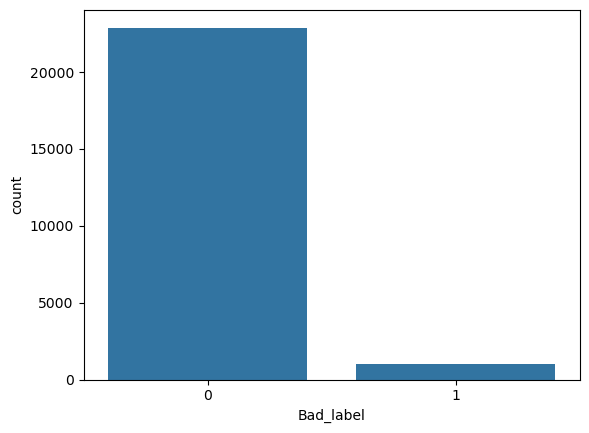

In [37]:
#count plot for targate column Bad_label.0 Represent--> Customer has Good credit history.1 Represent--> Customer has Bad credit history.
sns.countplot(x='Bad_label',data=data)

##### the above plot we can say that  90% Customers have Good credit and 10% customers do not have Good credit.This target feature is not balanced.

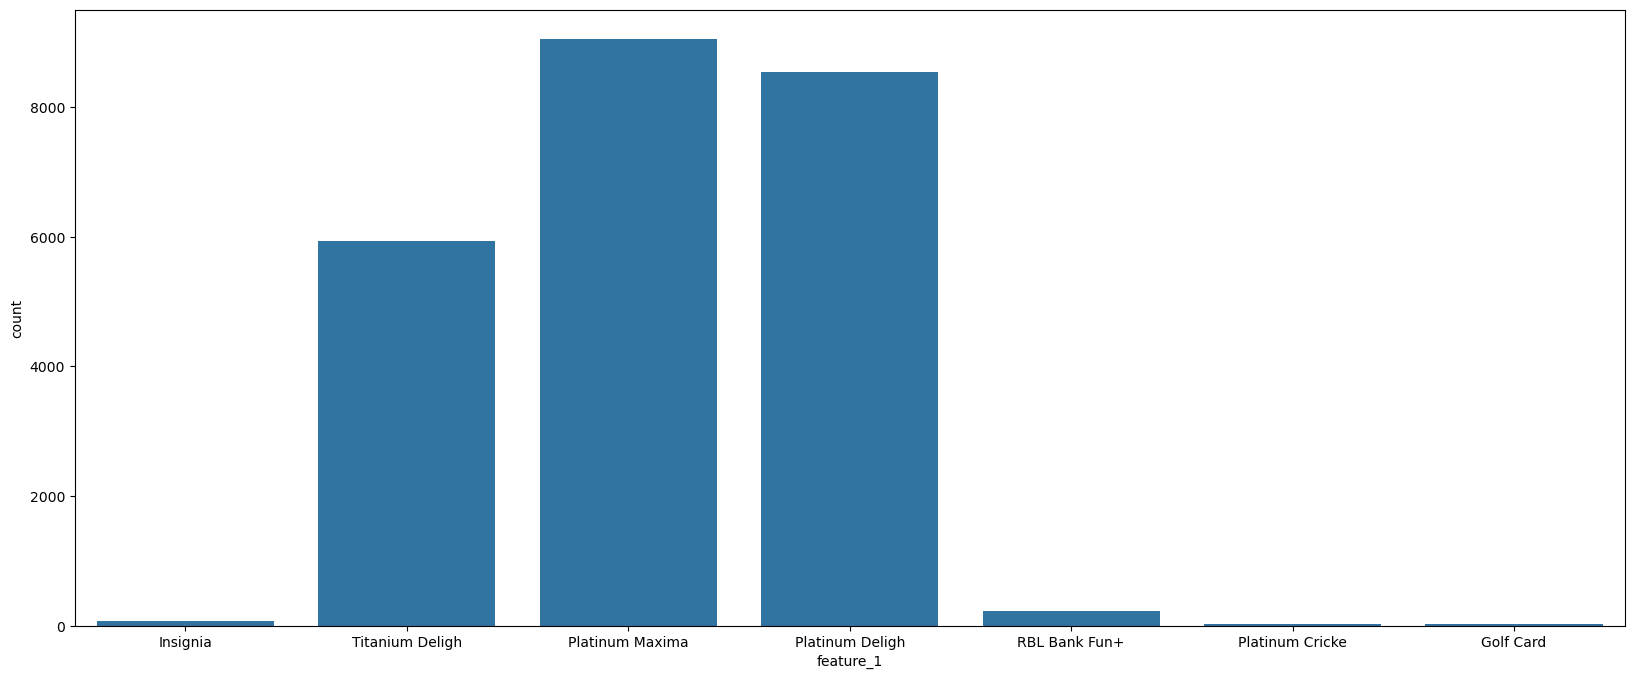

In [38]:
plt.figure(figsize= (20, 8))
sns.countplot(x='feature_1',data=data)
plt.show()

##### feature_1 is the type of credit card a customer holds.The above graph shows the count of the customers who holds the different kind of credit cards (Insigina,platinum deligh,Platinum Maxima,Titanium Deligh,RBL Bank Fun+,Golf Card,Platinum Cricke)

In [39]:
data.feature_51.unique()

array(['State Bank of India', nan, 'Citibank N.A.', 'HDFC Bank',
       'American Express Banking Corporation', 'AXIS Bank',
       'Standard Chartered Bank', 'IndusInd Bank Ltd.', 'ICICI Bank',
       'Kotak Mahindra Bank Ltd.', 'HSBC Bank'], dtype=object)

<Axes: xlabel='feature_51', ylabel='count'>

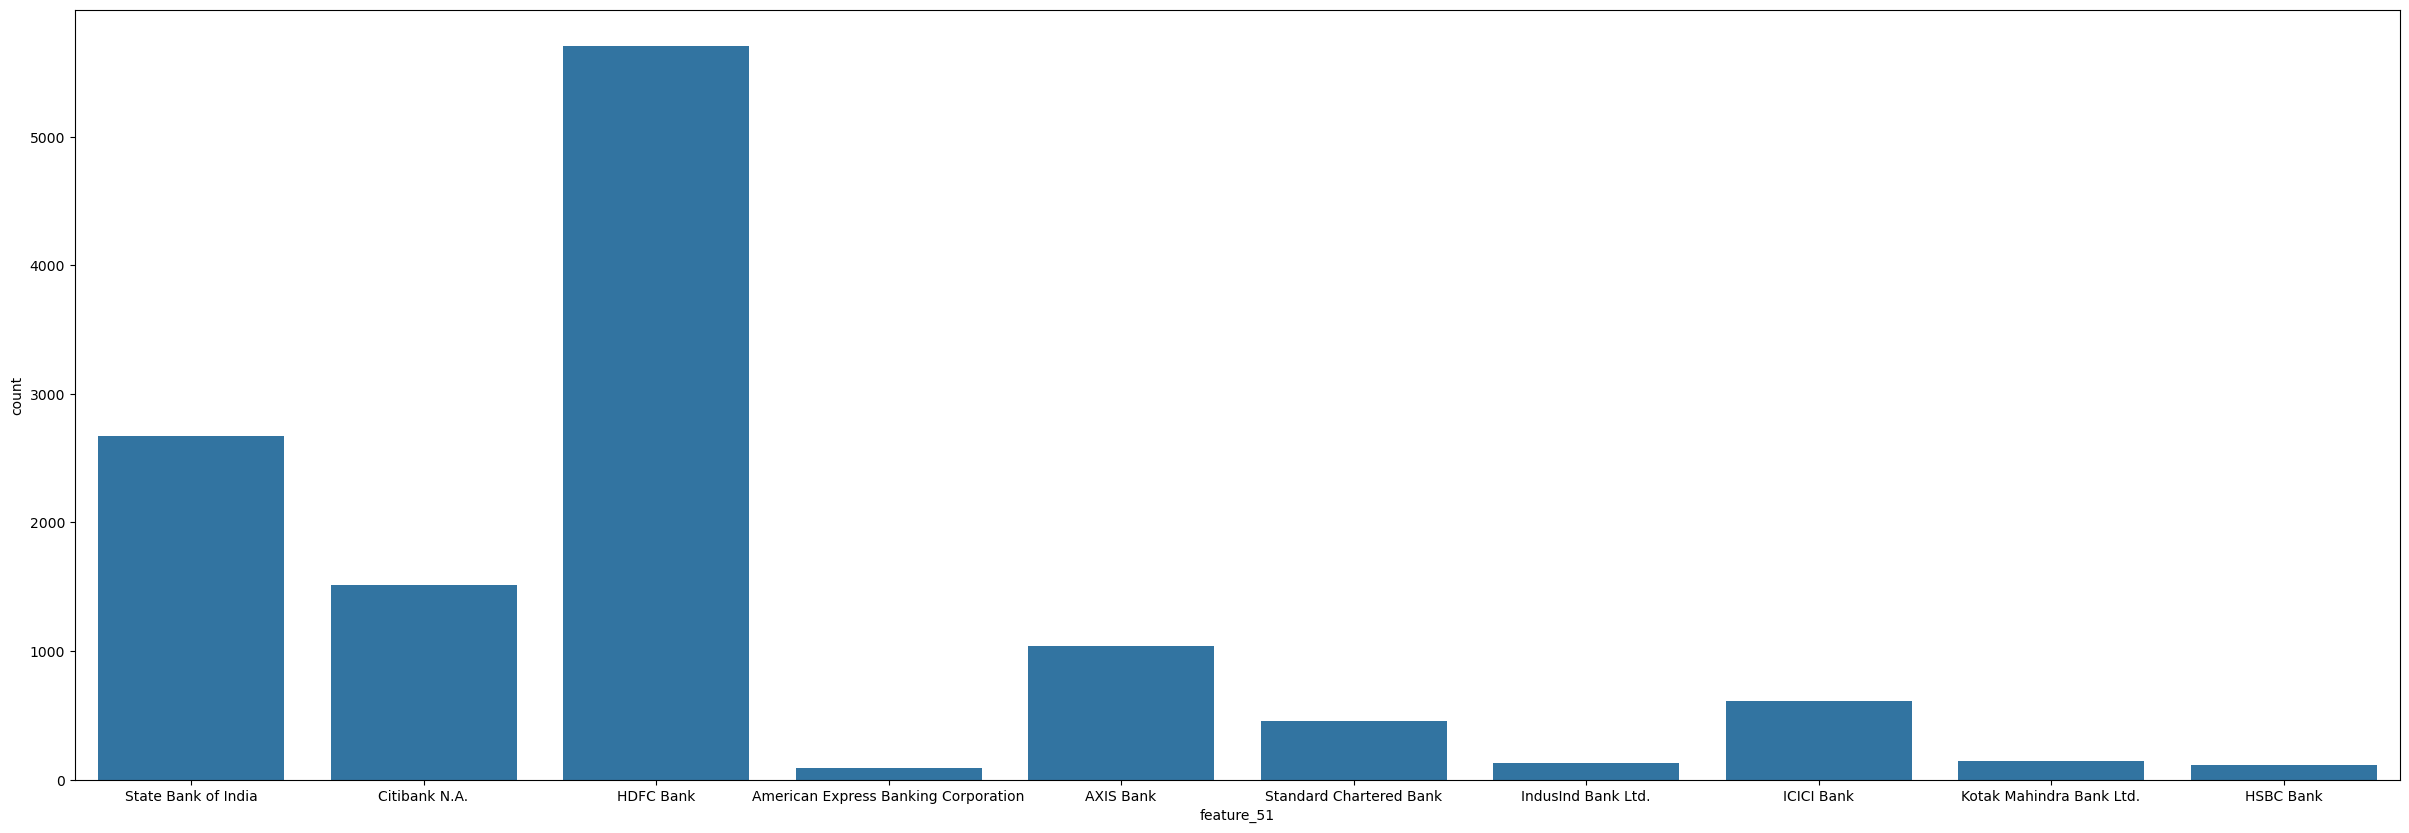

In [43]:
plt.figure(figsize=(30,10))
sns.countplot(x=data.feature_51)

##### feature_51 is the different banks to which customer belongs to.The above figure shows that count of customers and the bank to which they belong .

In [40]:
data.feature_1.value_counts()

feature_1
Platinum Maxima    9056
Platinum Deligh    8541
Titanium Deligh    5943
RBL Bank Fun+       218
Insignia             67
Golf Card            30
Platinum Cricke      26
Name: count, dtype: int64

### Bivariate Analysis

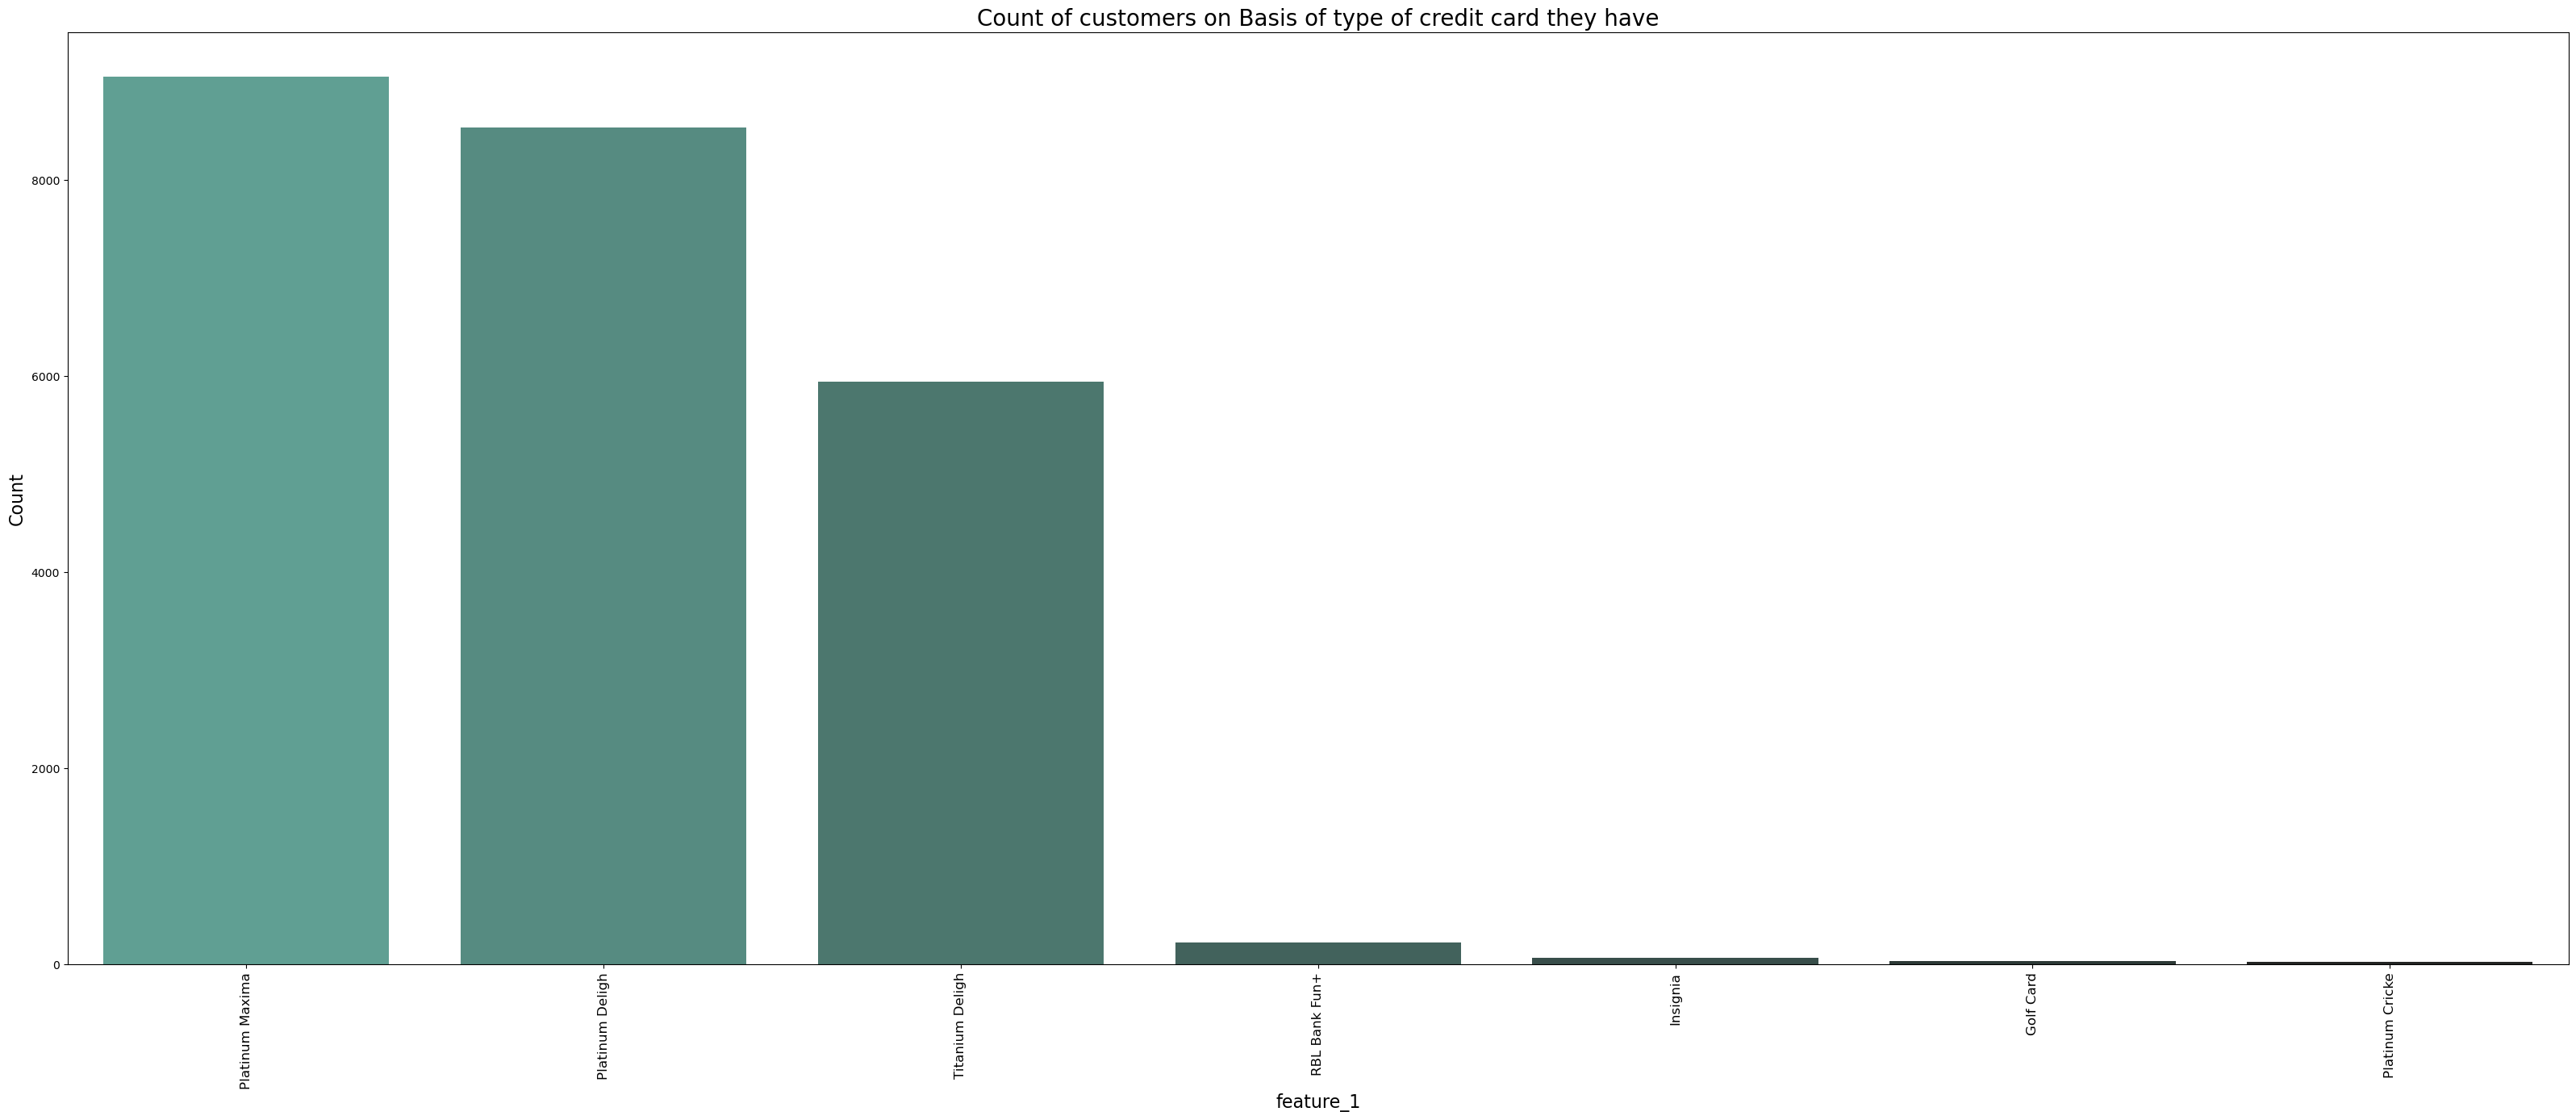

In [42]:
plt.figure(figsize=(40,15))
ax=sns.countplot(x=data.feature_1,palette="dark:#5A9_r",order=data.feature_1.value_counts().index)
ax.set_title(label='Count of customers on Basis of type of credit card they have', fontsize=20)
ax.set_xlabel(xlabel='feature_1', fontsize=16)
ax.set_ylabel(ylabel='Count', fontsize=16)
plt.xticks(rotation=90, fontsize=12)
plt.show()

##### The above figure shows count of type of credit card the customer holds.Most of the customers hold platinum maxima card.


In [43]:
data.feature_46.unique()

array(['PAN Card', nan, 'Passport', 'Driving License', 'Voter ID',
       'Aadhar Card'], dtype=object)

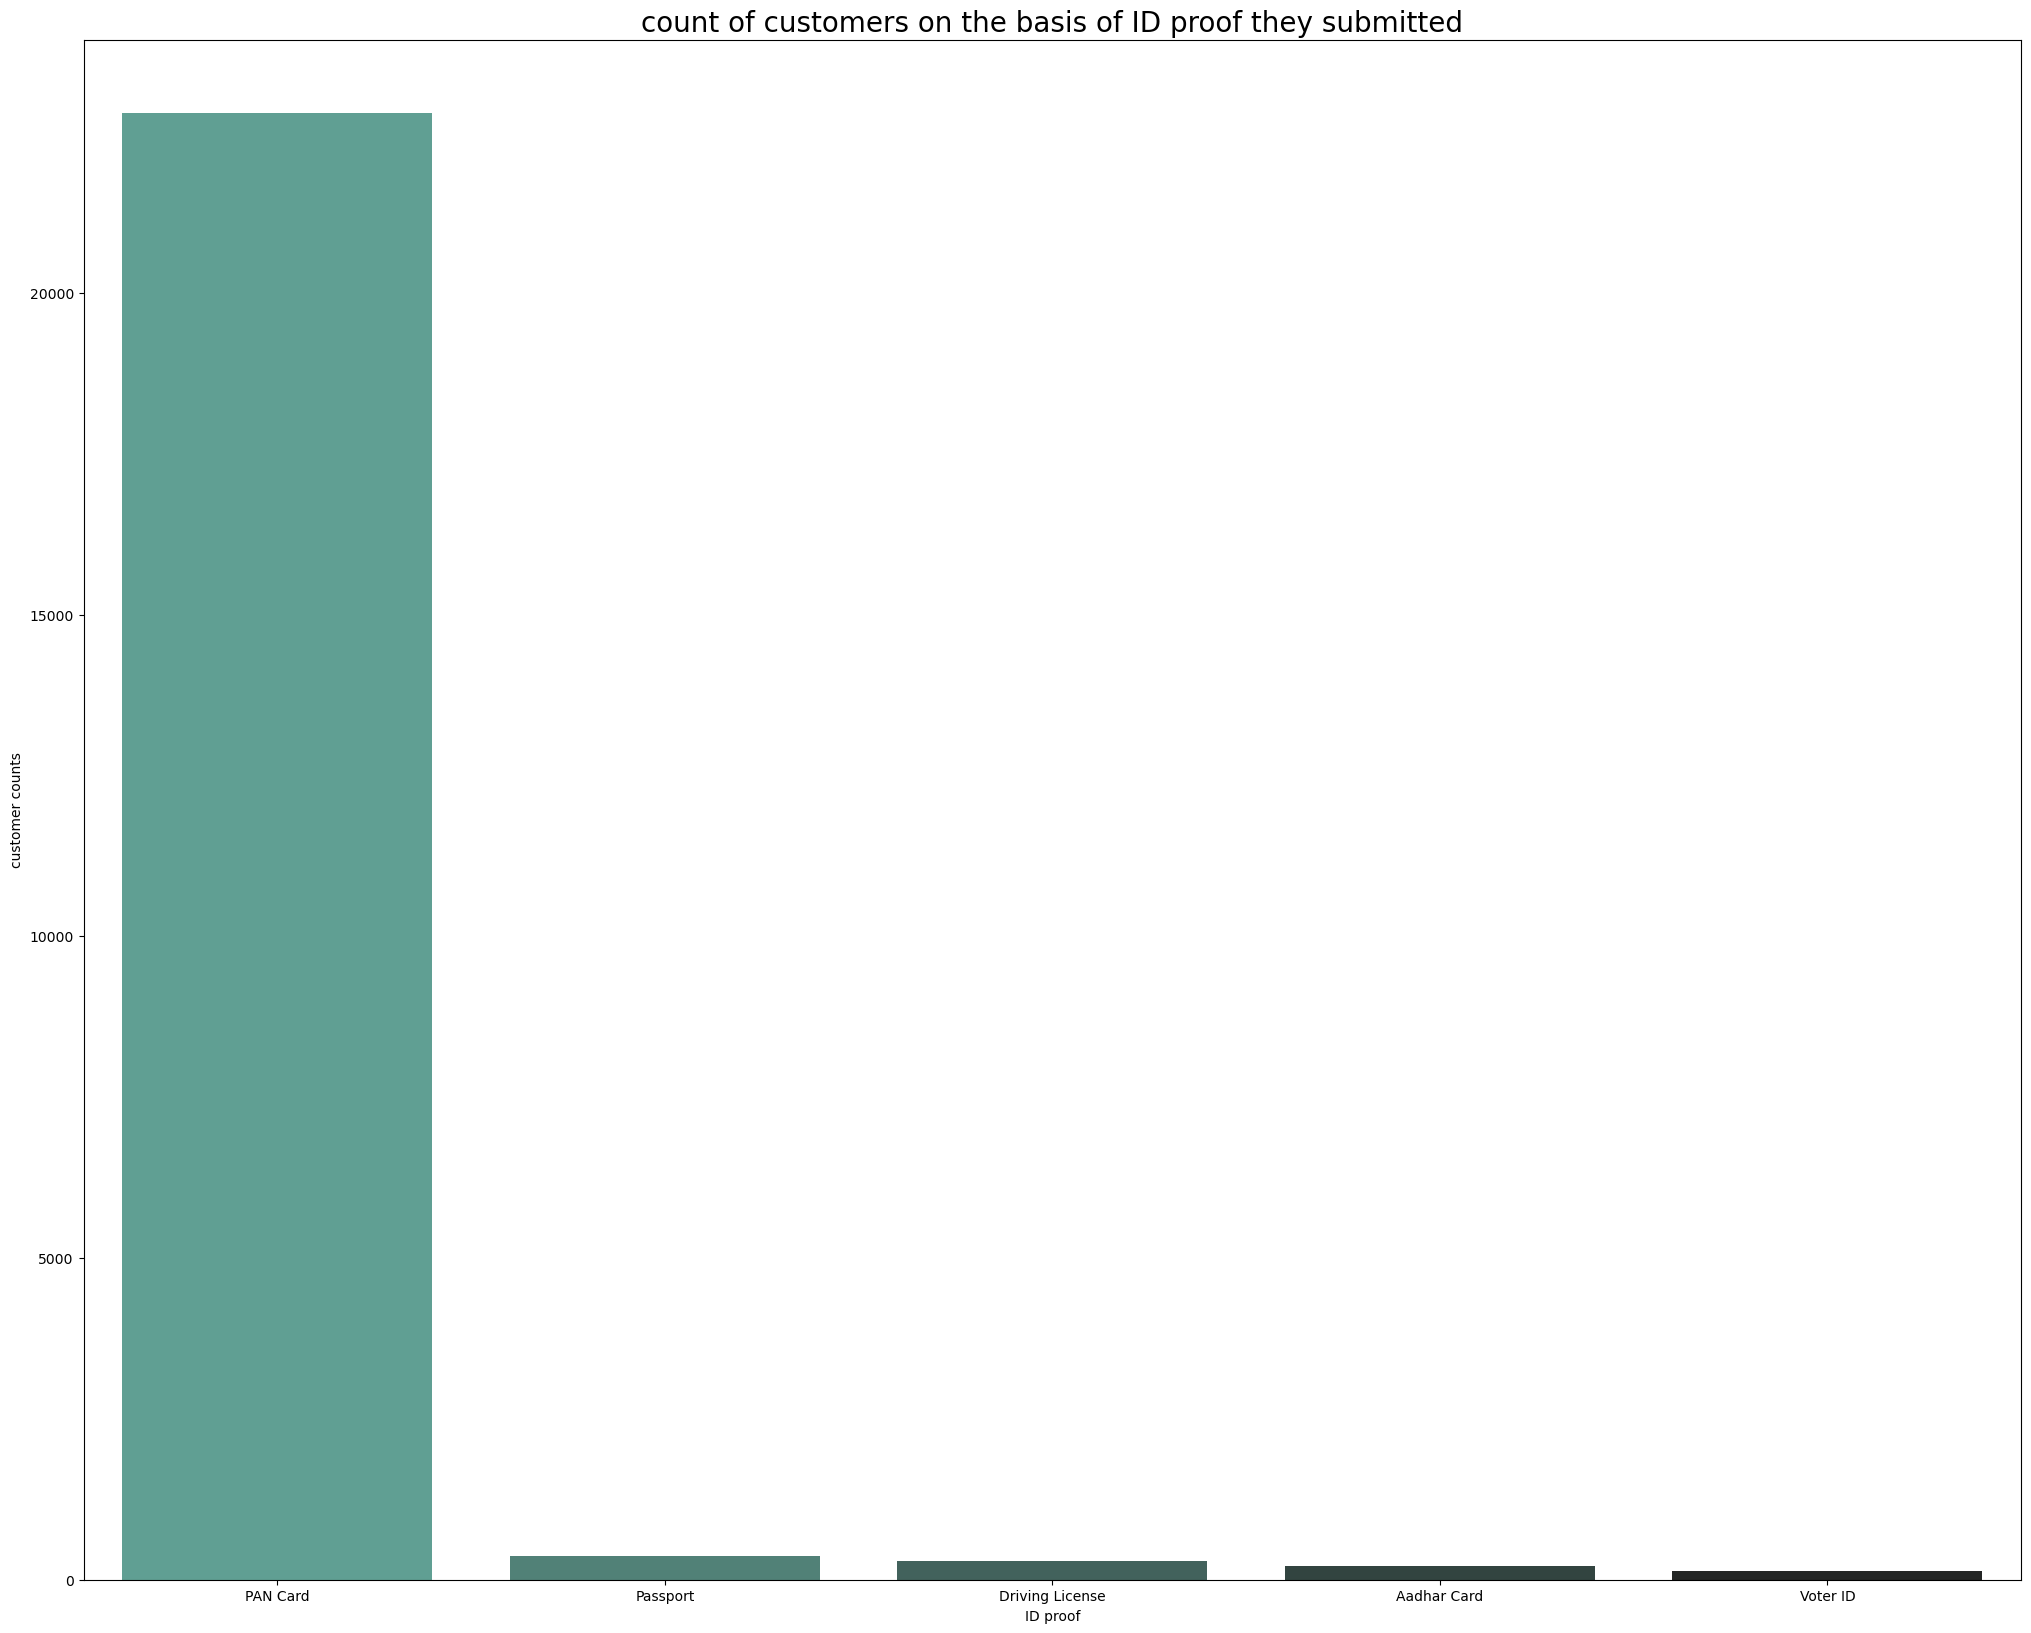

In [47]:
plt.figure(figsize=(25,20))
ax=sns.countplot(x=data.feature_46,palette="dark:#5A9_r",order=data.feature_46.value_counts().index)
ax.set_title('count of customers on the basis of ID proof they submitted',fontsize=20)
ax.set_xlabel('ID proof')
ax.set_ylabel('customer counts')
plt.show()


##### Most of the customers submitted PAN Card as ID prof.

Text(0.5, 1.0, 'type of credit card v/s Bad_label')

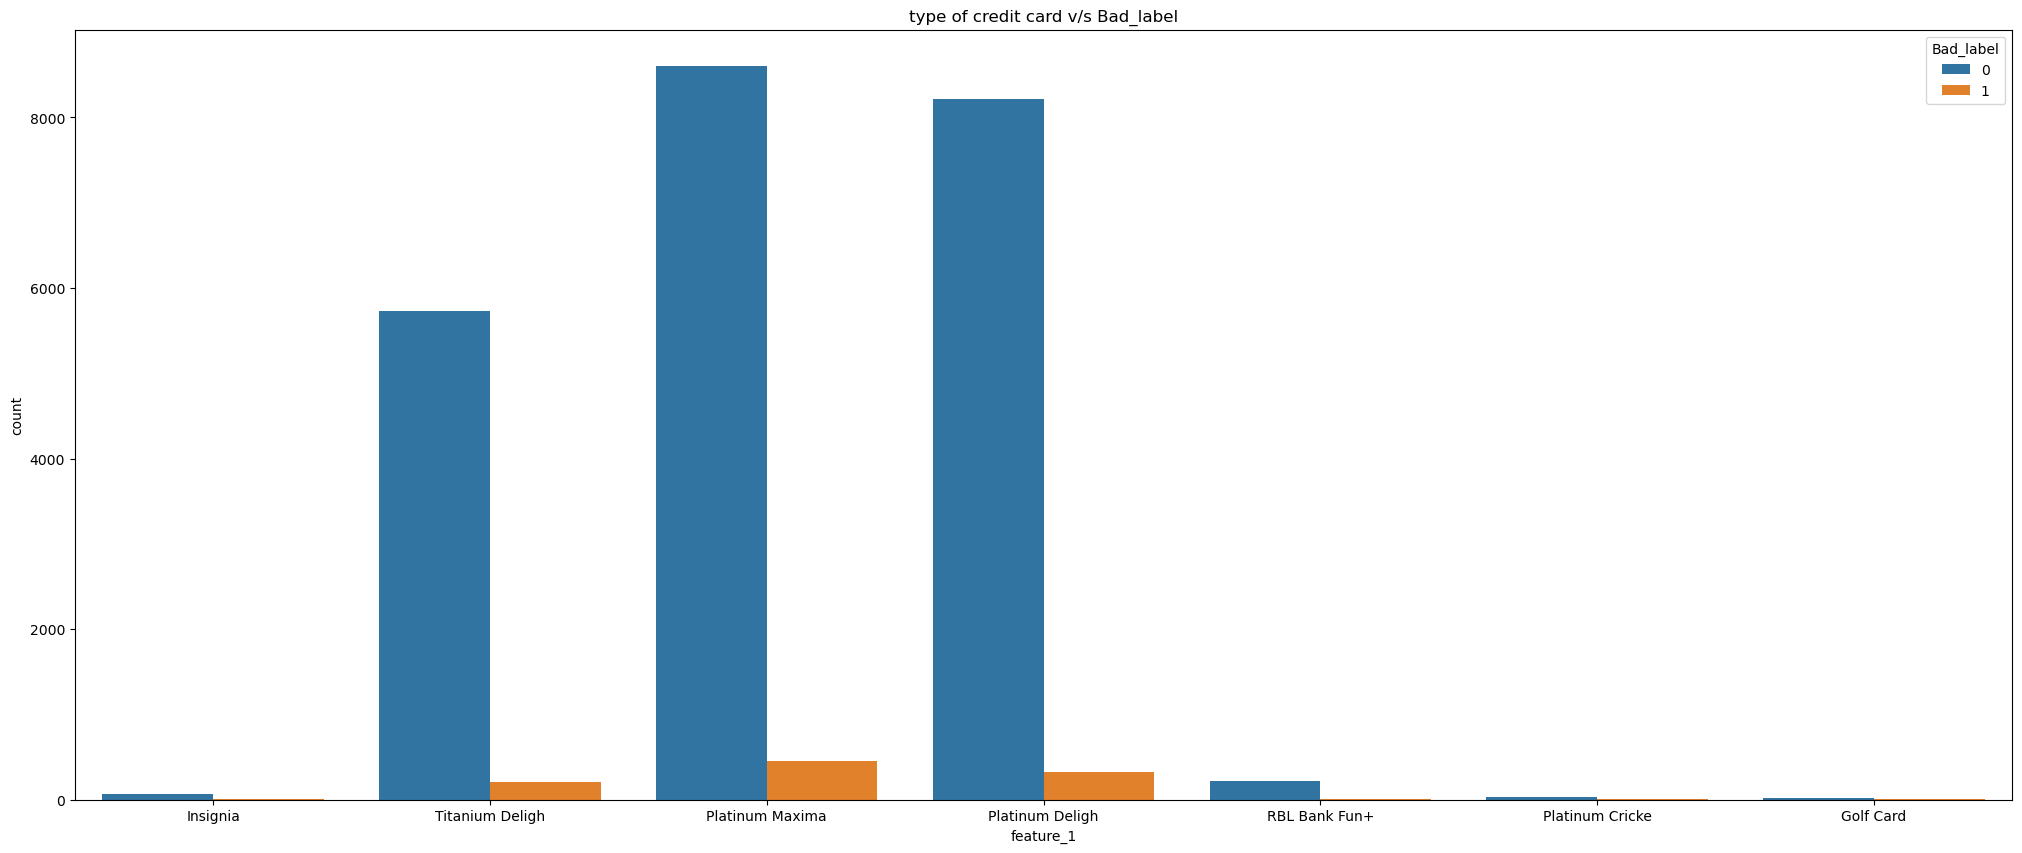

In [48]:
plt.figure(figsize= (25, 10))
sns.countplot(data= data, x='feature_1',hue='Bad_label')
plt.title('type of credit card v/s Bad_label')

##### The above plot we can say that most of the customer holding Platinum card having good credit score.

## DATA PREPROCESSING 

## CHECK MISSING VALUE

In [44]:
pd.set_option('display.max_rows',None)
data.isnull().sum()

Unnamed: 0             0
customer_no            0
high_credit_amt       13
cur_balance_amt        0
amt_past_due       23110
cashlimit           5461
creditlimit         4024
dt_opened              0
entry_time            15
feature_1             15
feature_2           2836
feature_3           2836
feature_4             15
feature_5             15
feature_7             15
feature_8          22635
feature_9          22635
feature_10         23845
feature_11            15
feature_12            15
feature_13         13004
feature_14          7733
feature_15            23
feature_16            27
feature_17         22869
feature_18         23878
feature_19            15
feature_20             0
feature_21            15
feature_22             0
feature_23            15
feature_24           640
feature_25            15
feature_26            15
feature_27          3637
feature_28            15
feature_29            15
feature_30            15
feature_31            15
feature_32            15


##### In this data set most of the feature contain missing values with including unique feature. 
##### 1) Numerical feature missing value impute with Median/Mean.
##### 2) Categorical feature missing value impute with mode(use fillna function to impute categorical value).

In [45]:
#check missing value percentange
null_value=data.isnull().sum()
null_value_percent=(null_value/data.isnull().count()*100)
null_value_data=pd.concat([null_value, null_value_percent],keys=['missing_count','missing_percent'],axis=1)
null_value_data

missing_count  missing_percent
Unnamed: 0                   0         0.000000
customer_no                  0         0.000000
high_credit_amt             13         0.054402
cur_balance_amt              0         0.000000
amt_past_due             23110        96.710747
cashlimit                 5461        22.853197
creditlimit               4024        16.839638
dt_opened                    0         0.000000
entry_time                  15         0.062772
feature_1                   15         0.062772
feature_2                 2836        11.868095
feature_3                 2836        11.868095
feature_4                   15         0.062772
feature_5                   15         0.062772
feature_7                   15         0.062772
feature_8                22635        94.722966
feature_9                22635        94.722966
feature_10               23845        99.786575
feature_11                  15         0.062772
feature_12                  15         0.062772
feature_13               13004        54.419150
feature_14                7733        32.361065
feature_15                  23         0.096250
feature_16                  27         0.112990
feature_17               22869        95.702210
feature_18               23878        99.924674
feature_19                  15         0.062772
feature_20                   0         0.000000
feature_21                  15         0.062772
feature_22                   0         0.000000
feature_23                  15         0.062772
feature_24                 640         2.678273
feature_25                  15         0.062772
feature_26                  15         0.062772
feature_27                3637        15.220121
feature_28                  15         0.062772
feature_29                  15         0.062772
feature_30                  15         0.062772
feature_31                  15         0.062772
feature_32                  15         0.062772
feature_33                  15         0.062772
feature_34                  15         0.062772
feature_35                  15         0.062772
feature_36                5682        23.778038
feature_37                5682        23.778038
feature_38                5682        23.778038
feature_39                  15         0.062772
feature_40                  15         0.062772
feature_41                  15         0.062772
feature_42                  15         0.062772
feature_43                  15         0.062772
feature_44                  15         0.062772
feature_45               13713        57.386173
feature_46                  94         0.393371
feature_47                   0         0.000000
feature_48               18399        76.996150
feature_49               23792        99.564781
feature_50                  15         0.062772
feature_51               11422        47.798795
feature_52                  15         0.062772
feature_53               11610        48.585537
feature_54                  15         0.062772
feature_55                  15         0.062772
feature_56                  15         0.062772
feature_57               21503        89.985772
feature_58                  15         0.062772
feature_59                  15         0.062772
feature_60                  15         0.062772
feature_61               23887        99.962337
feature_62                  15         0.062772
feature_63                  15         0.062772
feature_64                  15         0.062772
feature_65                  15         0.062772
feature_66                  15         0.062772
feature_67                  15         0.062772
feature_68                  15         0.062772
feature_69                  15         0.062772
feature_70                  15         0.062772
feature_71                  15         0.062772
feature_72                  15         0.062772
feature_73               20951        87.675762
feature_74               23879        99.928858
feature_75                  15   

##### calculate percent of null value for each column.

In [46]:
data = data.replace('[\£#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]','',regex=True)

##### the above code replace all special char with ' ' empty string.

In [47]:
data_1 = ['feature_8','feature_9','feature_10','feature_13','feature_14','feature_17',
'feature_18','feature_38','feature_45',
'feature_49','feature_51','feature_53','feature_57','feature_61','feature_73','feature_74','amt_past_due']

In [48]:
data.drop(data_1,axis=1,inplace=True)

##### 17 Features has more than 15% to 90% missing value and some unique feature also contain missing value so we drop this feature.Remaining feature missing value is less than 15% so we impute the missing value.

In [49]:
numerical_features=data[['feature_3','feature_4','feature_7','feature_19','feature_25','feature_26','feature_29','feature_30','feature_31','feature_34',
                        'feature_35','feature_39','feature_40','feature_41','feature_42','feature_44','feature_52','feature_55','feature_56','feature_64','feature_65',
                        'feature_66','feature_67','feature_68','feature_69','feature_71','feature_76','feature_78']]
categorical_features=data[['high_credit_amt','cur_balance_amt','cashlimit','creditlimit','dt_opened','entry_time','feature_1','feature_2','feature_5','feature_11',
                           'feature_12','feature_15','feature_16','feature_20','feature_21','feature_22','feature_23','feature_24','feature_27','feature_28','feature_32',
                           'feature_33','feature_36','feature_37','feature_43','feature_46','feature_47','feature_48','feature_50','feature_54','feature_58','Bad_label',
                           'feature_59','feature_60','feature_62','feature_63','feature_70','feature_72','feature_75','feature_77','feature_79','enq_sum',]]                      

### Check distribution of numerical features

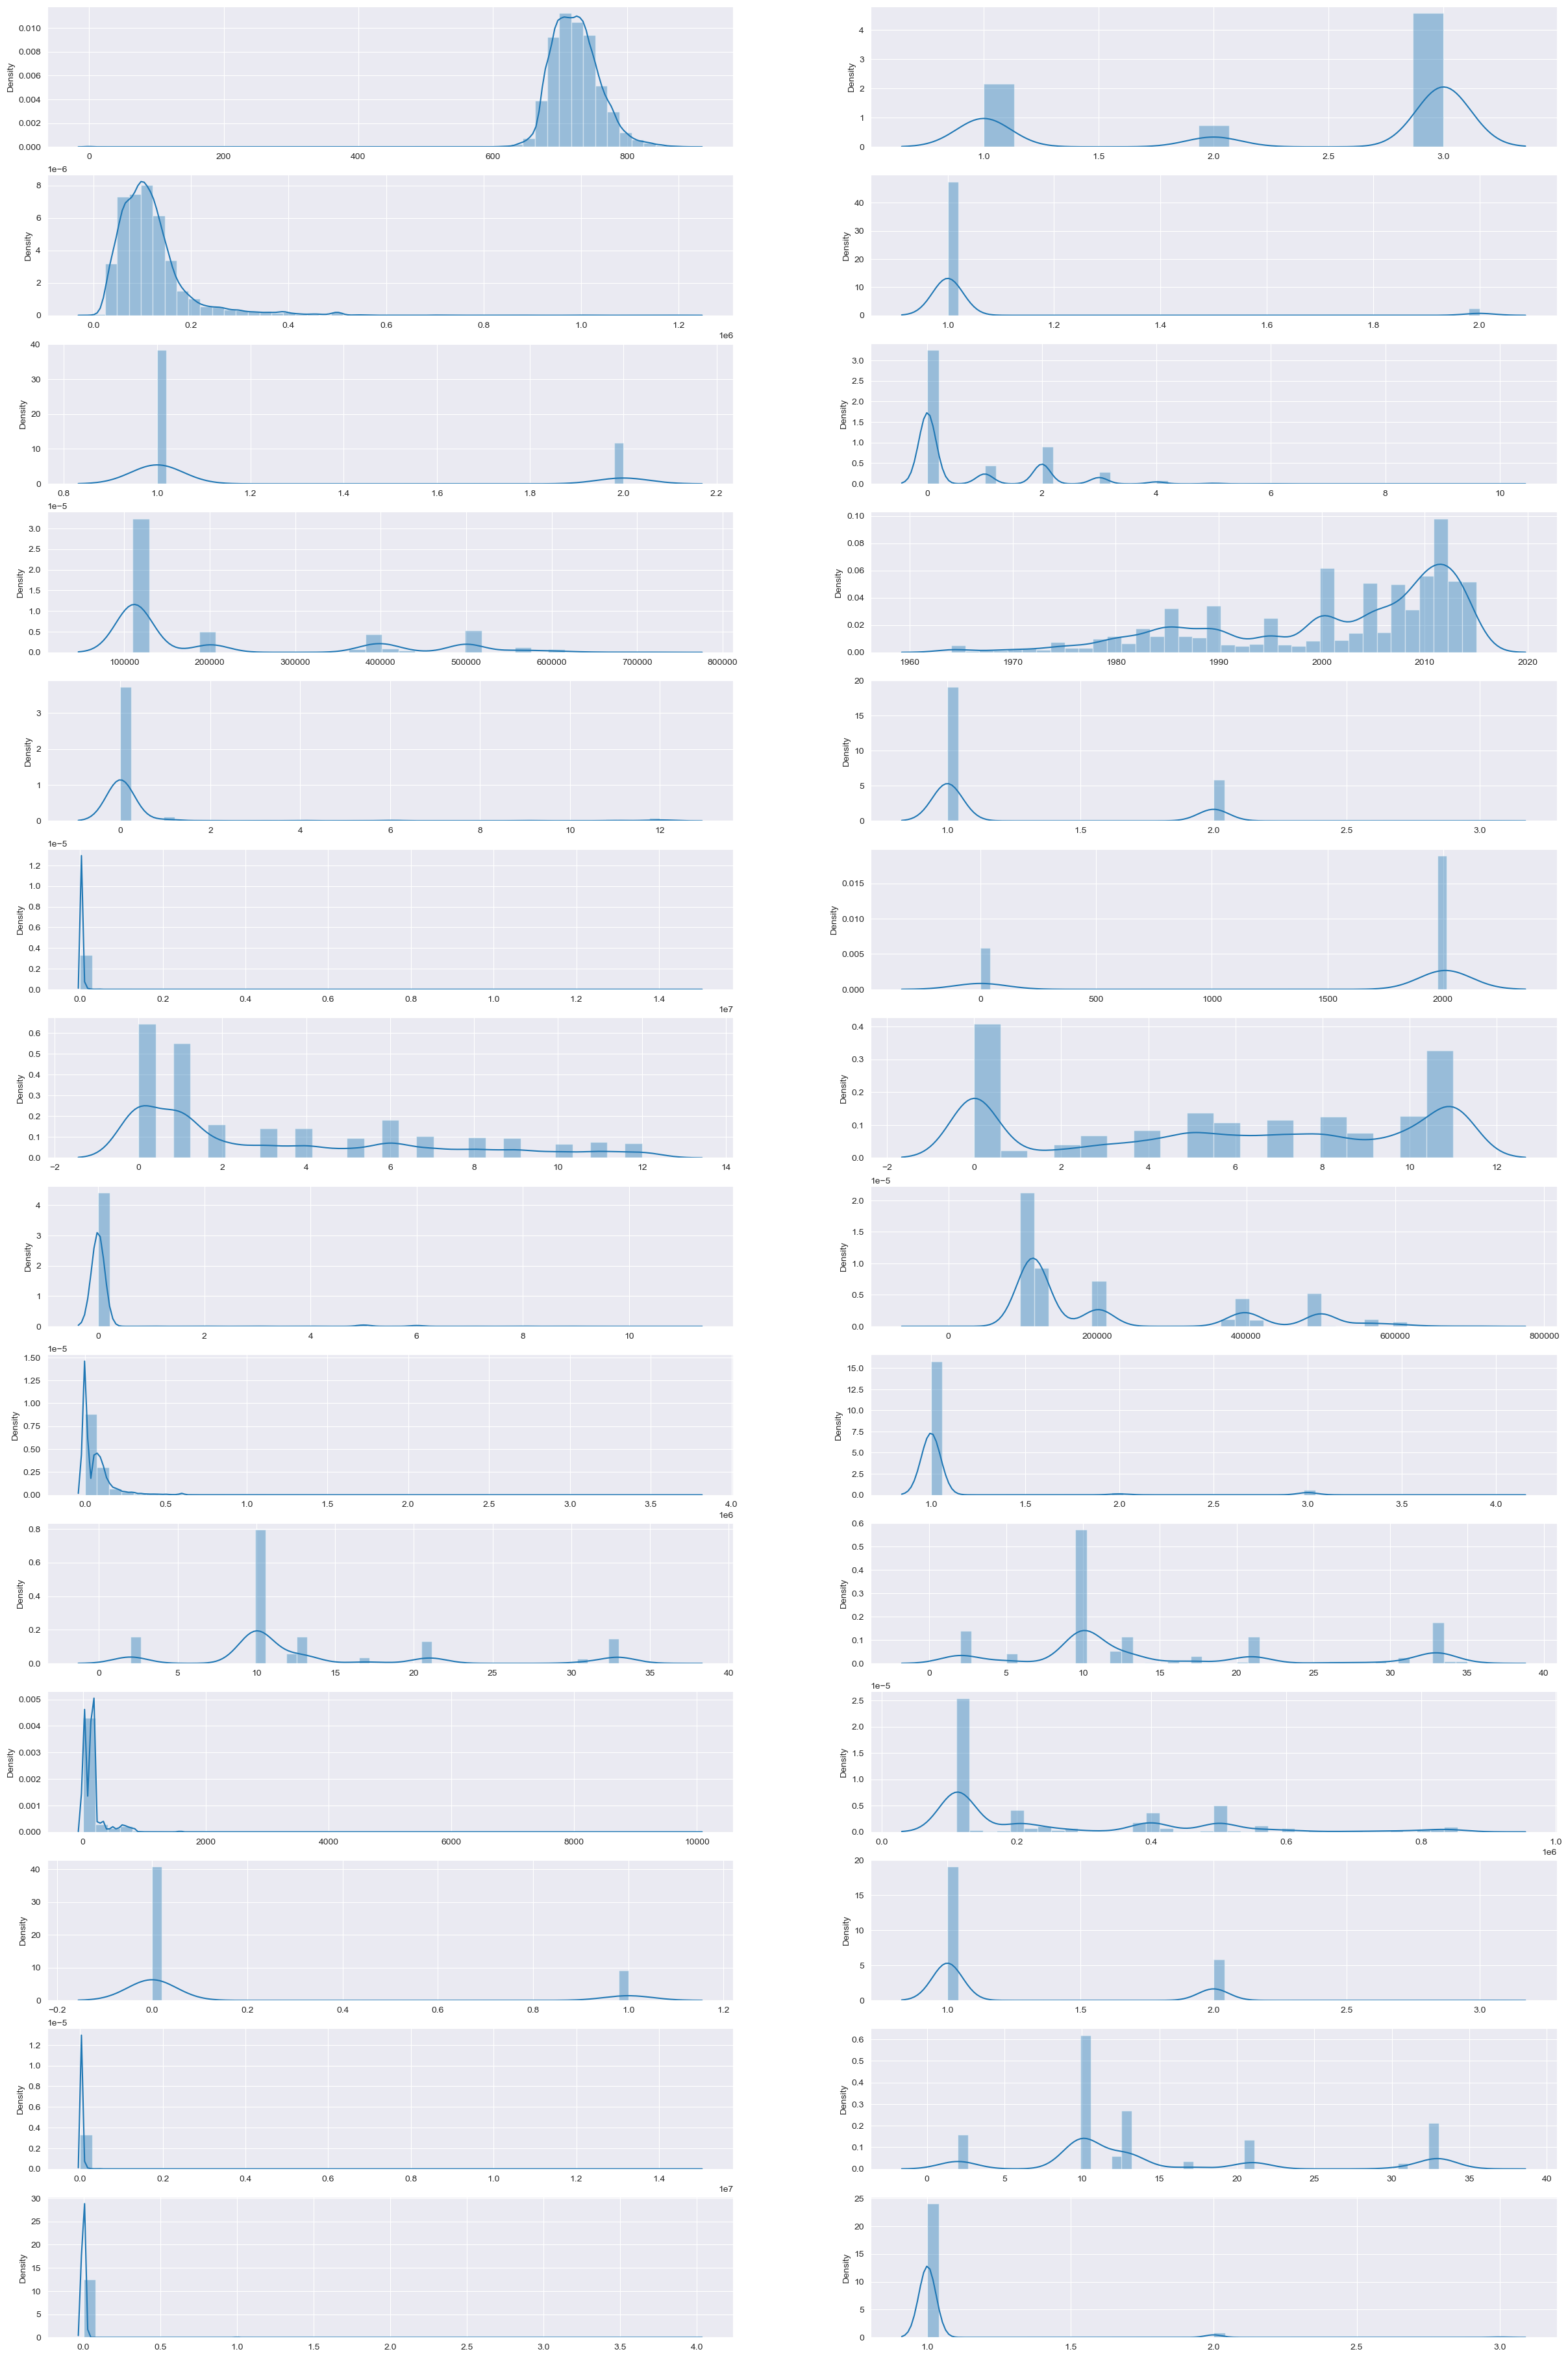

<Figure size 640x480 with 0 Axes>

In [51]:
plt.figure(figsize=(30,50))
sns.set_style('darkgrid')
plotnumber=1
for column in numerical_features:
    if plotnumber<=30:
        plt.subplot(15,2,plotnumber)
        sns.distplot(x=numerical_features[column])
        plotnumber=plotnumber+1
plt.show()
plt.tight_layout()        

##### The above plot we analyze data is not follow normal distribution so we replace null value with median value.

In [52]:
# replace null value for all numerical cols with median value of columns.
data[numerical_features.columns]=data[numerical_features.columns].fillna(data[numerical_features.columns].median())

In [53]:
#again check for null value percent.
null_value=data.isnull().sum()
percent=(data.isnull().sum()/data.isnull().count()*100)
null_percent=pd.concat([null_value,percent],axis=1,keys=('null_value','percent'))
null_percent

null_value    percent
Unnamed: 0                0   0.000000
customer_no               0   0.000000
high_credit_amt          13   0.054402
cur_balance_amt           0   0.000000
cashlimit              5461  22.853197
creditlimit            4024  16.839638
dt_opened                 0   0.000000
entry_time               15   0.062772
feature_1                15   0.062772
feature_2              2836  11.868095
feature_3                 0   0.000000
feature_4                 0   0.000000
feature_5                15   0.062772
feature_7                 0   0.000000
feature_11               15   0.062772
feature_12               15   0.062772
feature_15               23   0.096250
feature_16               27   0.112990
feature_19                0   0.000000
feature_20                0   0.000000
feature_21               15   0.062772
feature_22                0   0.000000
feature_23               15   0.062772
feature_24              640   2.678273
feature_25                0   0.000000
feature_26                0   0.000000
feature_27             3637  15.220121
feature_28               15   0.062772
feature_29                0   0.000000
feature_30                0   0.000000
feature_31                0   0.000000
feature_32               15   0.062772
feature_33               15   0.062772
feature_34                0   0.000000
feature_35                0   0.000000
feature_36             5682  23.778038
feature_37             5682  23.778038
feature_39                0   0.000000
feature_40                0   0.000000
feature_41                0   0.000000
feature_42                0   0.000000
feature_43               15   0.062772
feature_44                0   0.000000
feature_46               94   0.393371
feature_47                0   0.000000
feature_48            18399  76.996150
feature_50               15   0.062772
feature_52                0   0.000000
feature_54               15   0.062772
feature_55                0   0.000000
feature_56                0   0.000000
feature_58               15   0.062772
feature_59               15   0.062772
feature_60               15   0.062772
feature_62               15   0.062772
feature_63               15   0.062772
feature_64                0   0.000000
feature_65                0   0.000000
feature_66                0   0.000000
feature_67                0   0.000000
feature_68                0   0.000000
feature_69                0   0.000000
feature_70               15   0.062772
feature_71                0   0.000000
feature_72               15   0.062772
feature_75               15   0.062772
feature_76                0   0.000000
feature_77                0   0.000000
feature_78                0   0.000000
feature_79               15   0.062772
Bad_label                 0   0.000000
customer_no.1             0   0.000000
enq_count                 0   0.000000
enq_sum                 109   0.456143

In [54]:
# replace null values for categorical cols with mode value.

for col in categorical_features:
    mode=data[col].mode()[0]
    data[col]=data[col].fillna(mode)
    

In [55]:
#again check for null value percent.
null_value=data.isnull().sum()
percent=(data.isnull().sum()/data.isnull().count()*100)
null_percent=pd.concat([null_value,percent],axis=1,keys=('null_value','percent'))
null_percent

null_value  percent
Unnamed: 0                0      0.0
customer_no               0      0.0
high_credit_amt           0      0.0
cur_balance_amt           0      0.0
cashlimit                 0      0.0
creditlimit               0      0.0
dt_opened                 0      0.0
entry_time                0      0.0
feature_1                 0      0.0
feature_2                 0      0.0
feature_3                 0      0.0
feature_4                 0      0.0
feature_5                 0      0.0
feature_7                 0      0.0
feature_11                0      0.0
feature_12                0      0.0
feature_15                0      0.0
feature_16                0      0.0
feature_19                0      0.0
feature_20                0      0.0
feature_21                0      0.0
feature_22                0      0.0
feature_23                0      0.0
feature_24                0      0.0
feature_25                0      0.0
feature_26                0      0.0
feature_27                0      0.0
feature_28                0      0.0
feature_29                0      0.0
feature_30                0      0.0
feature_31                0      0.0
feature_32                0      0.0
feature_33                0      0.0
feature_34                0      0.0
feature_35                0      0.0
feature_36                0      0.0
feature_37                0      0.0
feature_39                0      0.0
feature_40                0      0.0
feature_41                0      0.0
feature_42                0      0.0
feature_43                0      0.0
feature_44                0      0.0
feature_46                0      0.0
feature_47                0      0.0
feature_48                0      0.0
feature_50                0      0.0
feature_52                0      0.0
feature_54                0      0.0
feature_55                0      0.0
feature_56                0      0.0
feature_58                0      0.0
feature_59                0      0.0
feature_60                0      0.0
feature_62                0      0.0
feature_63                0      0.0
feature_64                0      0.0
feature_65                0      0.0
feature_66                0      0.0
feature_67                0      0.0
feature_68                0      0.0
feature_69                0      0.0
feature_70                0      0.0
feature_71                0      0.0
feature_72                0      0.0
feature_75                0      0.0
feature_76                0      0.0
feature_77                0      0.0
feature_78                0      0.0
feature_79                0      0.0
Bad_label                 0      0.0
customer_no.1             0      0.0
enq_count                 0      0.0
enq_sum                   0      0.0

In [56]:
data.isnull().sum()

Unnamed: 0         0
customer_no        0
high_credit_amt    0
cur_balance_amt    0
cashlimit          0
creditlimit        0
dt_opened          0
entry_time         0
feature_1          0
feature_2          0
feature_3          0
feature_4          0
feature_5          0
feature_7          0
feature_11         0
feature_12         0
feature_15         0
feature_16         0
feature_19         0
feature_20         0
feature_21         0
feature_22         0
feature_23         0
feature_24         0
feature_25         0
feature_26         0
feature_27         0
feature_28         0
feature_29         0
feature_30         0
feature_31         0
feature_32         0
feature_33         0
feature_34         0
feature_35         0
feature_36         0
feature_37         0
feature_39         0
feature_40         0
feature_41         0
feature_42         0
feature_43         0
feature_44         0
feature_46         0
feature_47         0
feature_48         0
feature_50         0
feature_52   

### Convert categorical columns to numerical columns

In [57]:
categorical_features.columns

Index(['high_credit_amt', 'cur_balance_amt', 'cashlimit', 'creditlimit',
       'dt_opened', 'entry_time', 'feature_1', 'feature_2', 'feature_5',
       'feature_11', 'feature_12', 'feature_15', 'feature_16', 'feature_20',
       'feature_21', 'feature_22', 'feature_23', 'feature_24', 'feature_27',
       'feature_28', 'feature_32', 'feature_33', 'feature_36', 'feature_37',
       'feature_43', 'feature_46', 'feature_47', 'feature_48', 'feature_50',
       'feature_54', 'feature_58', 'Bad_label', 'feature_59', 'feature_60',
       'feature_62', 'feature_63', 'feature_70', 'feature_72', 'feature_75',
       'feature_77', 'feature_79', 'enq_sum'],
      dtype='object')

In [58]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
#for col in categorical_features:
    #data[col]=label.fit_transform(data[col])
data.high_credit_amt=label.fit_transform(data.high_credit_amt)
data.cur_balance_amt=label.fit_transform(data.cur_balance_amt)
data.cashlimit=label.fit_transform(data.cashlimit)
data.creditlimit=label.fit_transform(data.creditlimit)
data.dt_opened=label.fit_transform(data.dt_opened)
data.entry_time=label.fit_transform(data.entry_time)
data.feature_1=label.fit_transform(data.feature_1)
data.feature_2=label.fit_transform(data.feature_2)
data.feature_5=label.fit_transform(data.feature_5)
data.feature_11=label.fit_transform(data.feature_11)
data.feature_12=label.fit_transform(data.feature_12)
data.feature_15=label.fit_transform(data.feature_15)
data.feature_16=label.fit_transform(data.feature_16)
data.feature_20=label.fit_transform(data.feature_20)
data.feature_21=label.fit_transform(data.feature_21)
data.feature_22=label.fit_transform(data.feature_22)
data.feature_23=label.fit_transform(data.feature_23)
data.feature_24=label.fit_transform(data.feature_24)
data.feature_27=label.fit_transform(data.feature_27)
data.feature_28=label.fit_transform(data.feature_28)
data.feature_32=label.fit_transform(data.feature_32)
data.feature_33=label.fit_transform(data.feature_33)
data.feature_36=label.fit_transform(data.feature_36)
data.feature_37=label.fit_transform(data.feature_37)
data.feature_43=label.fit_transform(data.feature_43)
data.feature_46=label.fit_transform(data.feature_46)
data.feature_47=label.fit_transform(data.feature_47)
data.feature_48=label.fit_transform(data.feature_48)
data.feature_50=label.fit_transform(data.feature_50)
data.feature_54=label.fit_transform(data.feature_54)
data.feature_58=label.fit_transform(data.feature_58)
data.feature_59=label.fit_transform(data.feature_59)
data.feature_60=label.fit_transform(data.feature_60)
data.feature_62=label.fit_transform(data.feature_62)
data.feature_63=label.fit_transform(data.feature_63)
data.feature_70=label.fit_transform(data.feature_70)
data.feature_72=label.fit_transform(data.feature_72)
data.feature_75=label.fit_transform(data.feature_75)
data.feature_77=label.fit_transform(data.feature_77)
data.feature_79=label.fit_transform(data.feature_79)
data.Bad_label=label.fit_transform(data.Bad_label)
data.enq_sum=label.fit_transform(data.enq_sum)

##### The LabelEncoder is used to convert categorical data into numerical values.
##### label = LabelEncoder()-This line creates an instance of the LabelEncoder class, which will be used to perform the label encoding.
##### data.entry_time = label.fit_transform(data.entry_time)-This line encodes the 'entry_time' column in the data DataFrame. It replaces the categorical values in this column with numerical labels using the fit_transform method of the LabelEncoder instance.
##### Similar encoding is performed for multiple columns, such as 'feature_1', 'feature_2', 'feature_5', and so on, using the same LabelEncoder instance.Each line follows the same pattern: the specified column is encoded, replacing its categorical values with numerical labels.

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23896 entries, 0 to 23895
Data columns (total 74 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       23896 non-null  int64  
 1   customer_no      23896 non-null  int64  
 2   high_credit_amt  23896 non-null  int32  
 3   cur_balance_amt  23896 non-null  int32  
 4   cashlimit        23896 non-null  int32  
 5   creditlimit      23896 non-null  int32  
 6   dt_opened        23896 non-null  int32  
 7   entry_time       23896 non-null  int32  
 8   feature_1        23896 non-null  int32  
 9   feature_2        23896 non-null  int32  
 10  feature_3        23896 non-null  float64
 11  feature_4        23896 non-null  float64
 12  feature_5        23896 non-null  int32  
 13  feature_7        23896 non-null  float64
 14  feature_11       23896 non-null  int32  
 15  feature_12       23896 non-null  int32  
 16  feature_15       23896 non-null  int32  
 17  feature_16  

In [64]:
data_2 = data[['entry_time', 'feature_1',
       'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_7',
       'feature_11', 'feature_12', 'feature_15', 'feature_16', 'feature_19',
       'feature_21', 'feature_23', 'feature_24',
       'feature_25', 'feature_26', 'feature_27', 'feature_28', 'feature_29',
       'feature_30', 'feature_31', 'feature_32', 'feature_33', 'feature_34',
       'feature_35', 'feature_36', 'feature_37', 'feature_39', 'feature_40',
       'feature_41', 'feature_42', 'feature_43', 'feature_44', 'feature_46',
       'feature_48', 'feature_50', 'feature_52', 'feature_54',
       'feature_55', 'feature_56', 'feature_58', 'feature_59', 'feature_60',
       'feature_62', 'feature_63', 'feature_64', 'feature_65', 'feature_66',
       'feature_67', 'feature_68', 'feature_69', 'feature_70', 'feature_71',
       'feature_72', 'feature_75', 'feature_76', 'feature_78',
       'feature_79','high_credit_amt', 'cur_balance_amt',
       'cashlimit', 'creditlimit', 'customer_no.1', 'enq_count',
       'enq_sum']]
len(data_2.columns)

66

##### Create dataframe for analysis.

## OUTLIER HANDLING

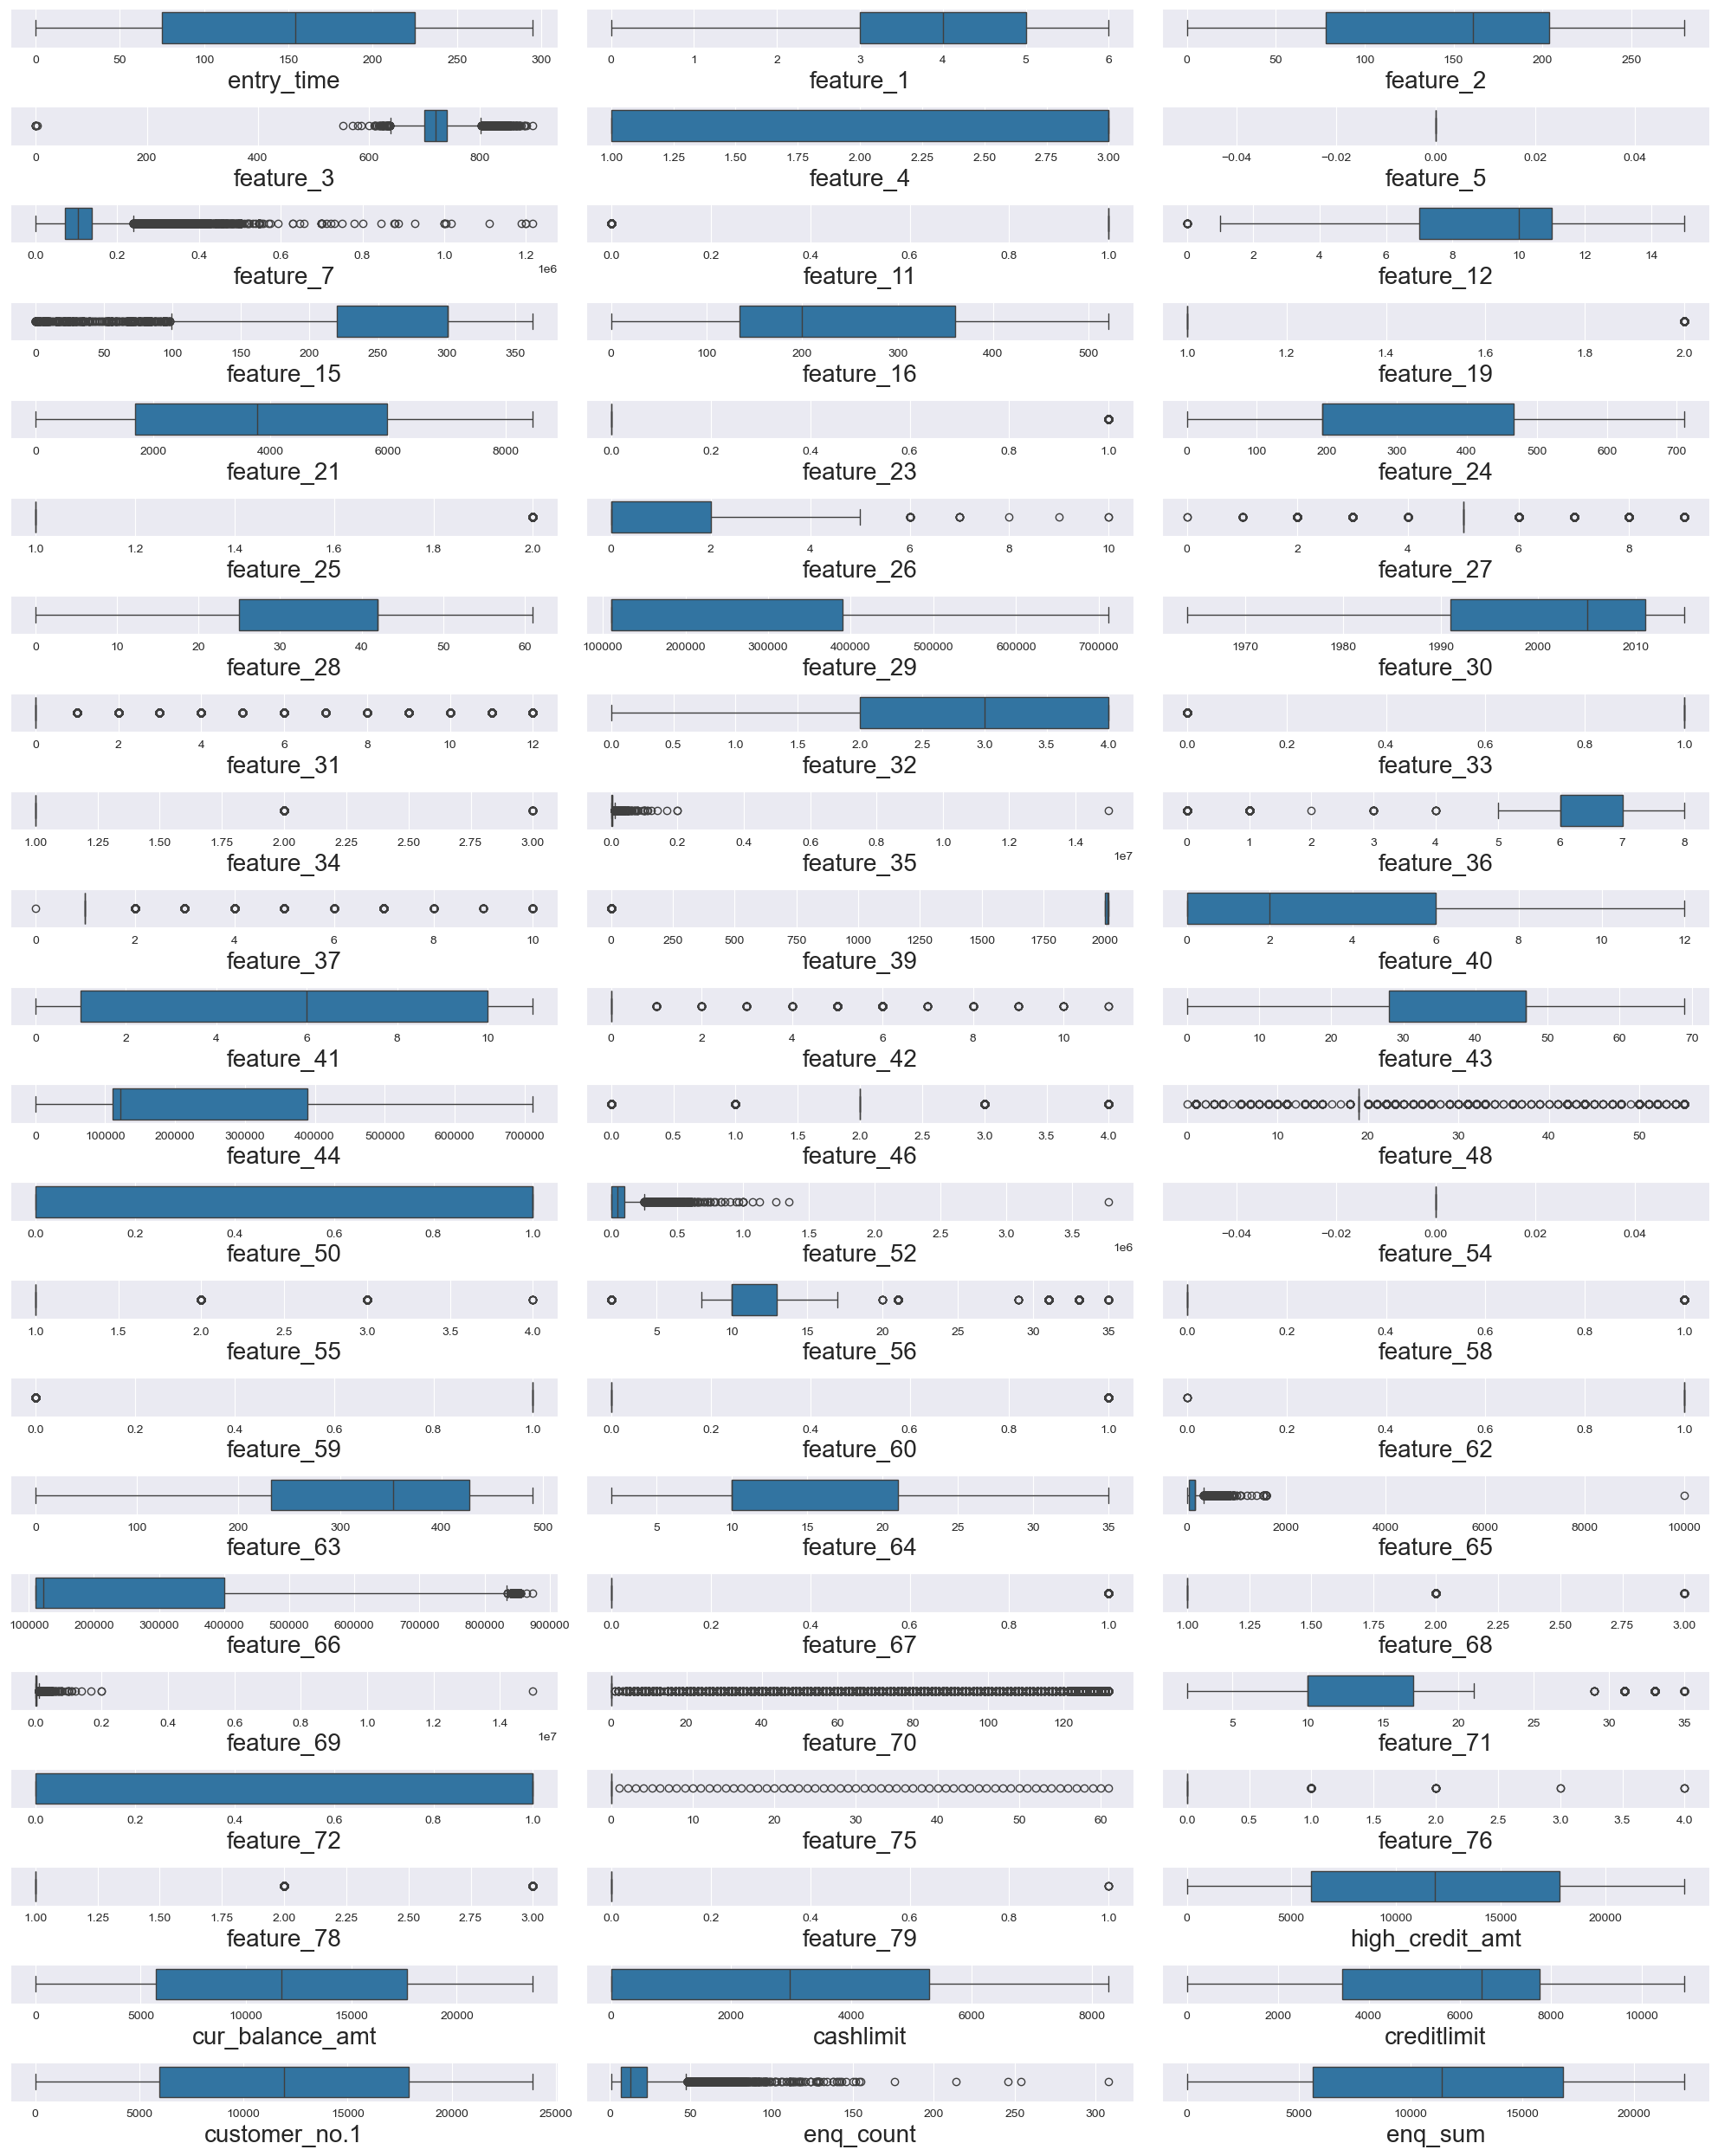

In [65]:
plt.figure(figsize=(20,25)) # defining canvas size
plotnum=1
for col in data_2: # iteration of columns / acessing the columns from  dataset
    if plotnum<=70: #set limit
        plt.subplot(22,3,plotnum)# plotting  graphs (22-rows,3-columns) and plotnumber is for count
        sns.boxplot(x=data_2[col])  # Plotting box plots
        plt.xlabel(col,fontsize=20)  # assigning name to x-axis and font size is 20
    plotnum=plotnum+1 #counter increment
plt.tight_layout() # subplots are neatly arranged within the canvas.
plt.show() # displays the entire set of subplots as a visualization.


##### Each box plot showing the distribution of a specific numerical feature in the dataset, helping to identify outliers and understand the data's statistical properties(minimum,25th percentile,median,75th percentile,maximum)
##### From the above EDA we see the features as private information.
##### We are not imputing the outlier, we are scaling to robust the outlier.

## FEATURE SCALING

### Robust Scaler

##### Robust scaler is a feature scaling technique that helps bring numerical features to a consistent scale while being robust to outliers, making it particularly useful for datasets with extreme values or non-standard distributions.By using the median and IQR, it is less influenced by extreme values compared to other scaling methods like the Standard Scaler or Min-Max Scaler.

In [66]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
data[data_2.columns]=scaler.fit_transform(data[data_2.columns])

##### The RobustScaler's robustness to outliers makes it particularly suitable when dealing with datasets that contain extreme values. By applying this scaler to the selected numerical features, we are ensuring that the features are scaled appropriately while considering the presence of outliers in the data.

In [67]:
data.head()

Unnamed: 0  customer_no  high_credit_amt  cur_balance_amt  cashlimit  \
0           0            1        -0.227034         0.040973  -0.024578   
1           1           10        -0.863318        -0.678423   0.214019   
2           2          100         0.822321         0.379409   0.998251   
3           3         1000         0.560633         0.201342   0.830742   
4           4        10000         0.528206        -0.242105  -0.562462   

   creditlimit  dt_opened  entry_time  feature_1  feature_2  feature_3  \
0    -0.472548        101   -0.253333       -1.5  -0.420635  -1.731707   
1    -0.135309        189    0.713333       -1.5   0.682540   1.536585   
2    -0.322996        142   -0.253333        1.0  -0.420635   1.439024   
3    -0.523088        173   -0.540000        1.0  -0.746032   1.439024   
4     0.306685        192   -0.400000        0.0  -0.587302  -0.512195   

   feature_4  feature_5  feature_7  feature_11  feature_12  feature_15  \
0       -0.5        0.0   5.910448         0.0       -1.75   -3.407407   
1       -1.0        0.0  13.626866         0.0       -1.50   -2.716049   
2        0.0        0.0   0.492537         0.0        1.00    0.000000   
3        0.0        0.0   2.820896         0.0        1.00    0.000000   
4        0.0        0.0   0.611940         0.0        0.00    0.000000   

   feature_16  feature_19  feature_20  feature_21  feature_22  feature_23  \
0   -0.703540         0.0         959   -0.663823        2513         0.0   
1   -0.557522         0.0          86   -0.268100        2391         0.0   
2   -0.309735         0.0        7650    1.030562        2224         0.0   
3   -0.309735         0.0        9294   -0.851984        2859         0.0   
4   -0.274336         0.0       10032   -0.063110        2855         0.0   

   feature_24  feature_25  feature_26  feature_27  feature_28  feature_29  \
0         1.0         0.0         1.0         0.0   -0.176471    1.037739   
1         0.0         0.0         1.5         0.0   -1.117647    0.042568   
2         0.0         0.0         1.0         3.0    0.000000   -0.000082   
3         1.0         0.0         1.5         3.0   -1.117647    0.042532   
4         0.0         0.0         0.0         0.0    0.000000   -0.000204   

   feature_30  feature_31  feature_32  feature_33  feature_34  feature_35  \
0       -2.00         0.0         0.5         0.0         1.0    1.395381   
1       -1.80         0.0         0.5         0.0         1.0   -0.697667   
2       -0.50         0.0         0.5         0.0         0.0    0.232564   
3        0.30         0.0         0.0        -1.0         0.0    0.232564   
4        0.05         1.0         0.0        -1.0         1.0   -0.697667   

   feature_36  feature_37  feature_39  feature_40  feature_41  feature_42  \
0         0.0         0.0 -143.571429   -0.333333   -0.666667         0.0   
1         0.0         0.0 -143.571429   -0.333333   -0.666667         0.0   
2         0.0         6.0    0.000000   -0.166667    0.444444         0.0   
3         0.0         0.0   -0.214286   -0.166667    0.555556         0.0   
4         0.0         0.0 -143.571429   -0.333333   -0.666667         0.0   

   feature_43  feature_44  feature_46  feature_47  feature_48  feature_50  \
0   -0.210526    0.993213         0.0        1148        31.0         0.0   
1   -0.210526    0.993092         0.0         309         0.0        -1.0   
2   -1.000000    0.000000         0.0        7724         0.0         0.0   
3   -1.000000    0.000004         0.0        9350         0.0         0.0   
4    0.000000   -0.042735         0.0       10080         0.0         0.0   

   feature_52  feature_54  feature_55  feature_56  feature_58  feature_59  \
0       -0.50         0.0         0.0    3.666667         1.0         0.0   
1       -0.50         0.0         0.0    1.000000         0.0         0.0   
2        0.09         0.0         0.0    0.000000         0.0         0.0   
3        1.75         0.0         0.0  

## FEATURES SELECTION

### DROP UNIQUE AND CONSTANT FEATURES

In [68]:
data.drop(['Unnamed: 0','dt_opened','entry_time','feature_5','feature_20','feature_22','feature_47','feature_54','feature_77','customer_no.1',],axis=1,inplace=True)

##### In this dataset unique column available('feature_5','feature_20','feature_22','feature_ 47','feature_54','feature_77') so drop this column Remove unwanted columns like ids,date,time.

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23896 entries, 0 to 23895
Data columns (total 64 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_no      23896 non-null  int64  
 1   high_credit_amt  23896 non-null  float64
 2   cur_balance_amt  23896 non-null  float64
 3   cashlimit        23896 non-null  float64
 4   creditlimit      23896 non-null  float64
 5   feature_1        23896 non-null  float64
 6   feature_2        23896 non-null  float64
 7   feature_3        23896 non-null  float64
 8   feature_4        23896 non-null  float64
 9   feature_7        23896 non-null  float64
 10  feature_11       23896 non-null  float64
 11  feature_12       23896 non-null  float64
 12  feature_15       23896 non-null  float64
 13  feature_16       23896 non-null  float64
 14  feature_19       23896 non-null  float64
 15  feature_21       23896 non-null  float64
 16  feature_23       23896 non-null  float64
 17  feature_24  

### CHECK CORRELATION BETWEEN COLUMNS.

In [70]:
data=data.astype('int64')

Heatmap :-
The heatmap is a powerful visualization tool for quickly identifying relationships between features in a dataset. It helps in understanding which features are strongly correlated, which can be important for feature selection, dimensionality reduction, and building predictive models.

In [71]:
data.corr()

customer_no  high_credit_amt  cur_balance_amt  cashlimit  \
customer_no         1.000000        -0.002361         0.008230   0.010325   
high_credit_amt    -0.002361         1.000000         0.131332  -0.000876   
cur_balance_amt     0.008230         0.131332         1.000000  -0.000577   
cashlimit           0.010325        -0.000876        -0.000577   1.000000   
creditlimit         0.012241        -0.011354         0.003082   0.056405   
feature_1          -0.687950         0.001292        -0.001941  -0.002010   
feature_2          -0.030750         0.011078         0.000840  -0.004001   
feature_3           0.025652         0.006129        -0.005298  -0.005078   
feature_4          -0.175635        -0.015912        -0.014020  -0.004923   
feature_7          -0.047912         0.007394         0.006312   0.003104   
feature_11         -0.032704         0.007354        -0.004274   0.006683   
feature_12         -0.691496         0.001919        -0.005815  -0.001311   
feature_15          0.172494        -0.001073        -0.003909  -0.002183   
feature_16         -0.138198         0.003671         0.016014  -0.006717   
feature_19         -0.003687         0.011612         0.004780   0.000423   
feature_21          0.006364         0.000240        -0.004281   0.001506   
feature_23         -0.096792        -0.005729         0.000105   0.000643   
feature_24         -0.055469         0.009174         0.015766  -0.003268   
feature_25          0.035894         0.001988        -0.011301   0.005467   
feature_26         -0.262112        -0.009506        -0.003472  -0.001288   
feature_27          0.018561        -0.006411        -0.002714   0.010482   
feature_28          0.080327        -0.008753        -0.002655  -0.004815   
feature_29         -0.253892         0.001582         0.017150  -0.008751   
feature_30          0.007046         0.005578        -0.002379   0.003717   
feature_31          0.199726         0.006339        -0.000453   0.003557   
feature_32          0.023333         0.002808         0.001851  -0.013993   
feature_33         -0.043709         0.007790         0.009724  -0.009570   
feature_34         -0.008931        -0.004678         0.007677  -0.005302   
feature_35         -0.017408        -0.001375        -0.001270  -0.000537   
feature_36          0.028949         0.002545         0.005820  -0.012713   
feature_37          0.149054         0.009196         0.001096   0.004319   
feature_39          0.009169         0.004615        -0.007834   0.005257   
feature_40          0.018312         0.004298        -0.009125  -0.008589   
feature_41               NaN              NaN              NaN        NaN   
feature_42          0.018286         0.009365         0.007607  -0.004670   
feature_43         -0.005007        -0.005697         0.003121  -0.006651   
feature_44         -0.243148         0.004023         0.012510  -0.004690   
feature_46          0.006816         0.000390         0.000257   0.000355   
feature_48         -0.023919        -0.000339        -0.002876  -0.005508   
feature_50         -0.107861         0.005113        -0.001084   0.002966   
feature_52         -0.037238         0.003459         0.007431  -0.000262   
feature_55         -0.007239         0.007052         0.006023  -0.006221   
feature_56          0.026292        -0.009591        -0.010143   0.011761   
feature_58         -0.054949        -0.004329        -0.002854  -0.003935   
feature_59         -0.032704         0.007354        -0.004274   0.006683   
feature_60         -0.031695        -0.003605        -0.002376  -0.003276   
feature_62         -0.001077         0.000449         0.000296   0.000408   
feature_63          0.004643         0.005349        -0.002984   0.003408   
feature_64          0.015241        -0.011942        -0.005919   0.014664   
feature_65          0.056863        -0.009142        -0.009648   0.005871   
feature_66         -0.137888        -0.002962         0.004912  -0.003048   
feature_67   

Each cell in the correlation matrix represents the correlation coefficient between two columns in the DataFrame. A high positive correlation (close to 1) suggests a strong positive linear relationship, while a high negative correlation (close to -1) suggests a strong negative linear relationship. A correlation close to 0 indicates little to no linear relationship. The correlation matrix is useful for understanding how different features in the dataset are related to each other. It's often used in data analysis to identify patterns, multicollinearity (where two or more variables are highly correlated), and to make informed decisions about feature selection or model building in machine learning.

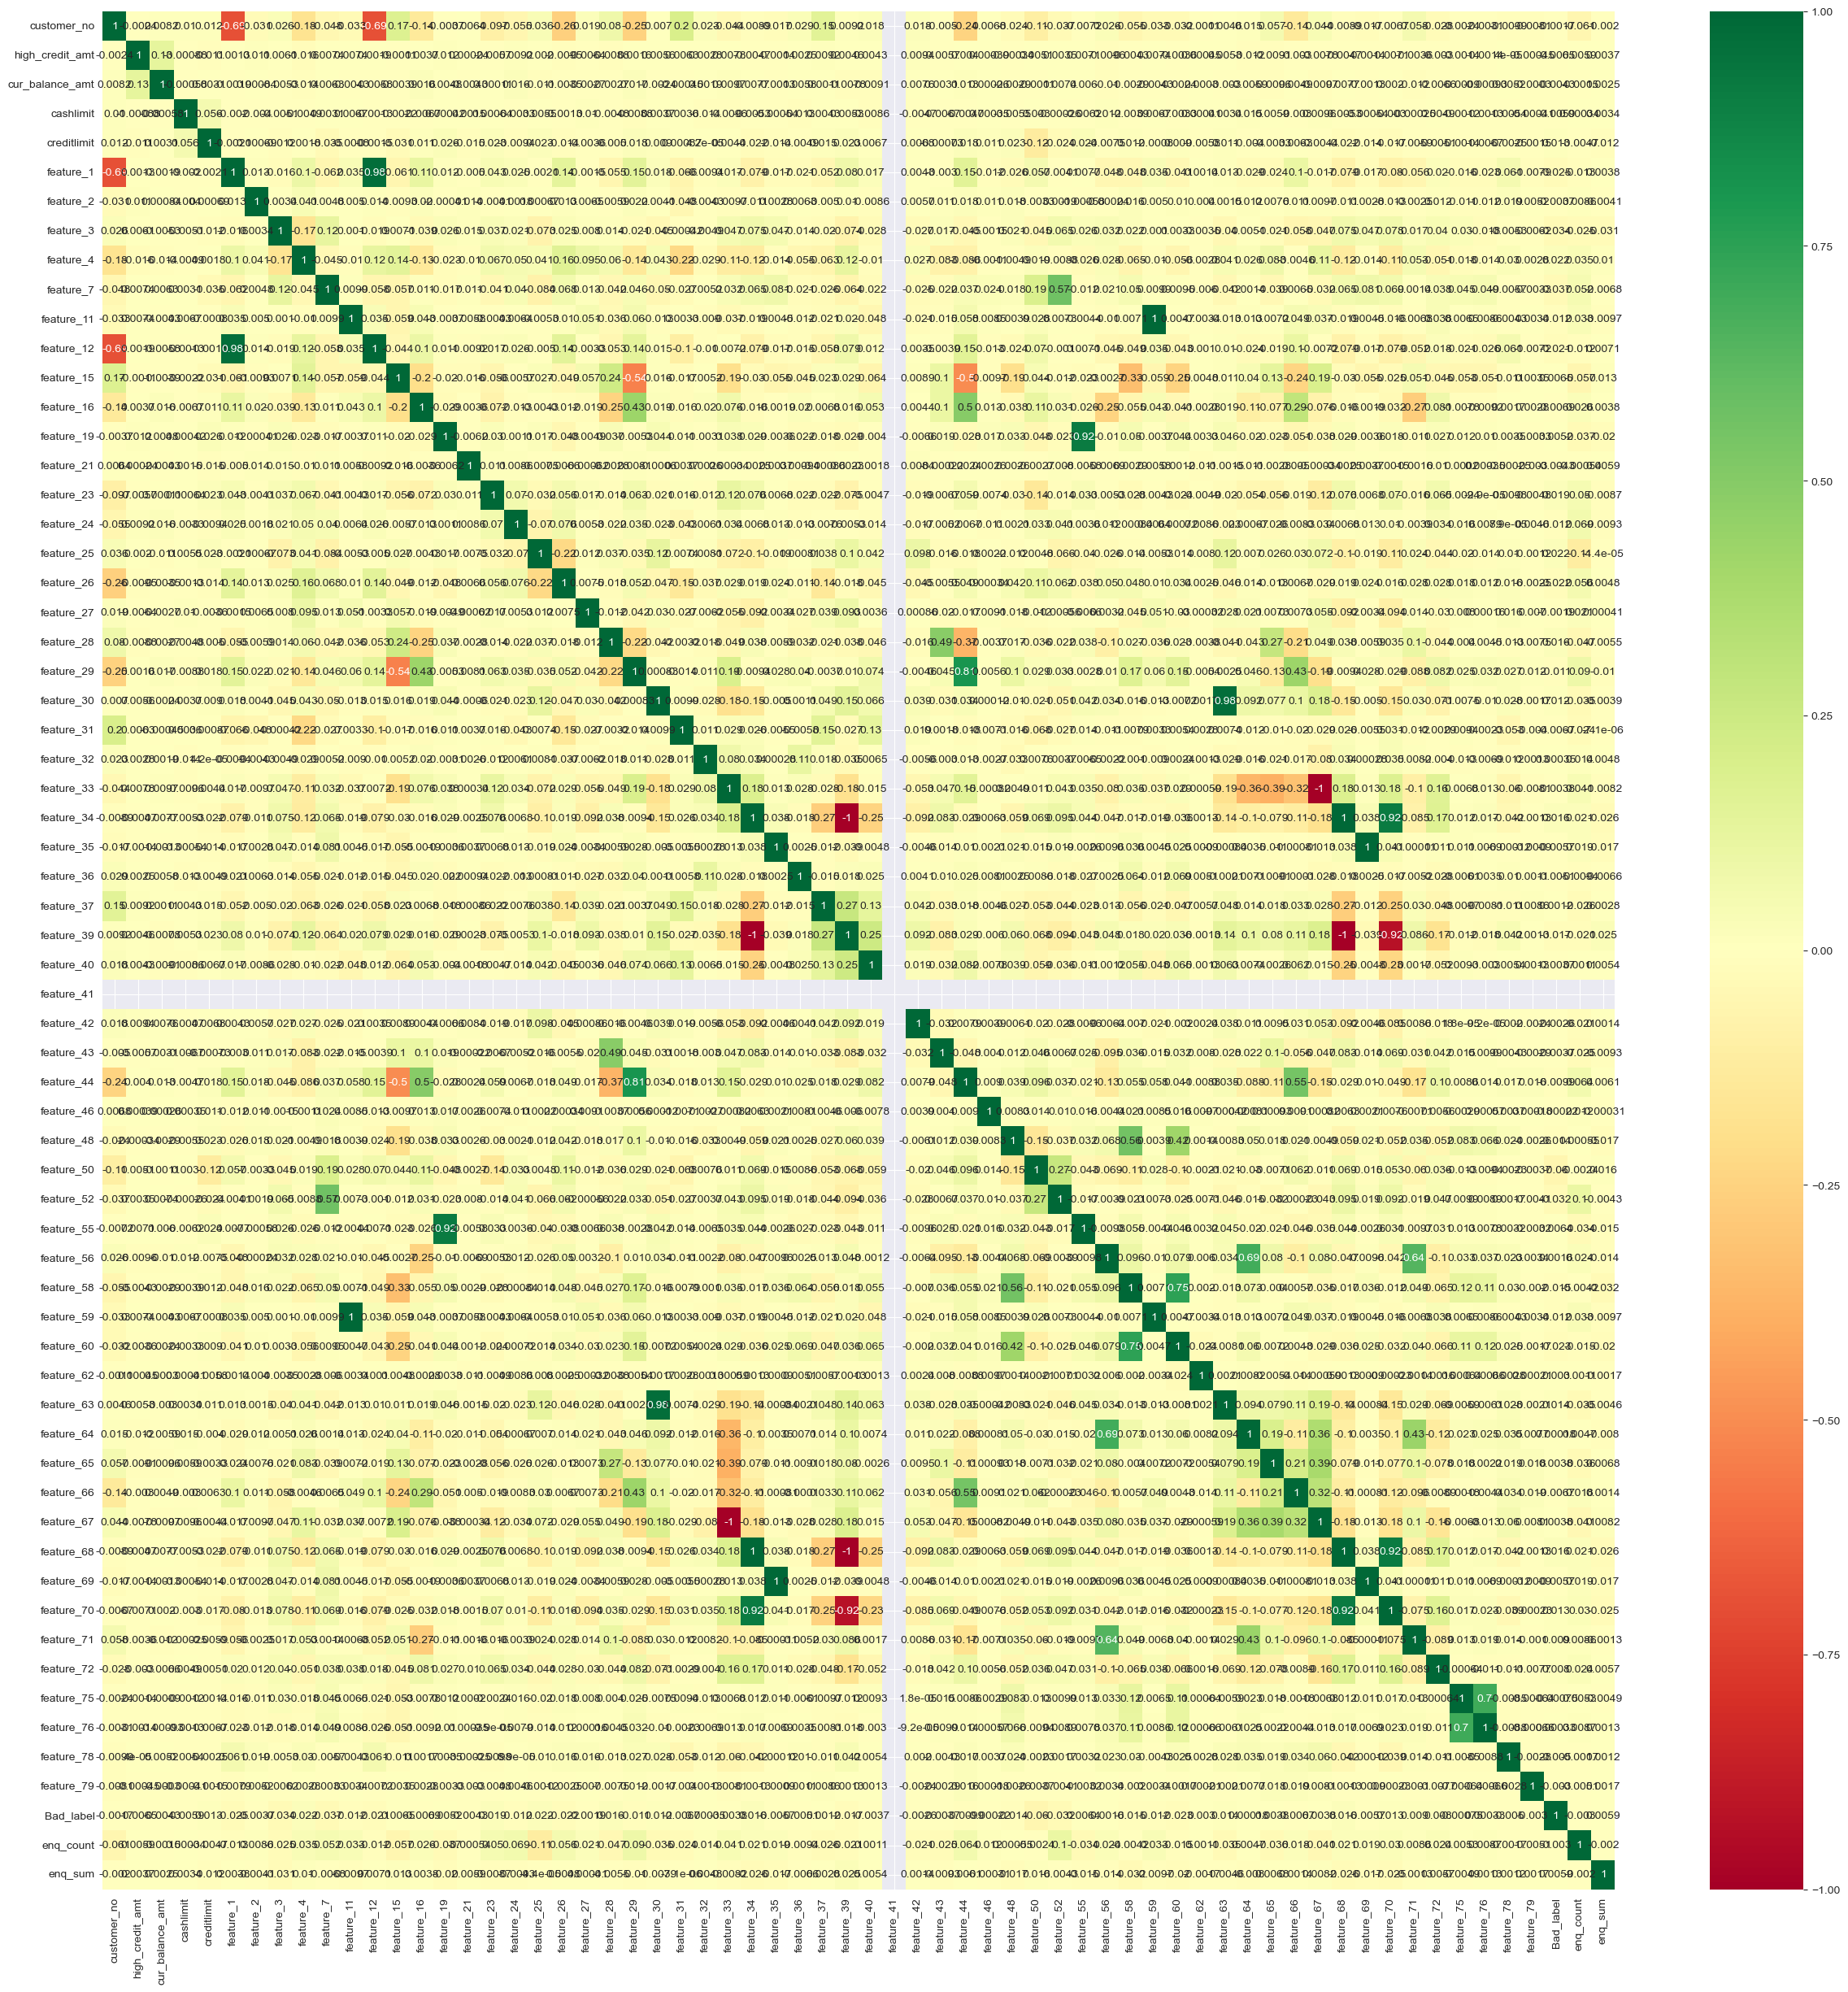

In [72]:
#check for correlation using heatmap.
plt.figure(figsize=(30,30))
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn')
plt.show()

annot=True: It specifies that the values of the correlation coefficients should be annotated (displayed) within each cell of the heatmap.
cmap='RdYlGn': This sets the color map for the heatmap. The 'RdYlGn' color map ranges from red (negative correlations) to yellow (no correlation) to green (positive correlations), helping to visually represent the strength and direction of correlations.

In [73]:
 #To get highly corelated features
pd.set_option('display.max_rows',None)
corrmat = data.corr()
corrmat = corrmat.abs().unstack()
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat [corrmat >= 0.9] # Set threshold 0.9
corrmat = corrmat [corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1','feature2','corr']
corrmat

feature1    feature2      corr
0   feature_68  feature_39  0.995830
1   feature_34  feature_39  0.995830
2   feature_39  feature_34  0.995830
3   feature_39  feature_68  0.995830
4   feature_12   feature_1  0.976392
5    feature_1  feature_12  0.976392
6   feature_30  feature_63  0.975522
7   feature_63  feature_30  0.975522
8   feature_70  feature_39  0.923731
9   feature_39  feature_70  0.923731
10  feature_68  feature_70  0.919709
11  feature_70  feature_68  0.919709
12  feature_34  feature_70  0.919709
13  feature_70  feature_34  0.919709
14  feature_19  feature_55  0.918357
15  feature_55  feature_19  0.918357

##### pd.set_option('display.max_rows', None): This line sets the display option to show all rows in the output, ensuring that all highly correlated pairs are visible.
##### corrmat = data.corr(): This code calculates the correlation matrix for all columns in the DataFrame data.
##### corrmat = corrmat.abs().unstack(): This line takes the absolute values of the correlation matrix and unstacks it. Unstacking transforms the correlation matrix into a series with pairs of features as indices.
##### corrmat = corrmat.sort_values(ascending=False): The code sorts the correlation values in descending order, which means that highly correlated pairs will appear at the top of the series.
##### corrmat = corrmat[corrmat >= 0.9]: This line filters the correlation values to only keep those that are greater than or equal to 0.9. In other words, it selects highly correlated pairs with a correlation coefficient of at least 0.9.
##### corrmat = corrmat[corrmat < 1]: Here, it further filters the correlation values to exclude pairs with a correlation coefficient of 1. A correlation of 1 indicates a perfect linear relationship, and we want to exclude such cases.
##### corrmat = pd.DataFrame(corrmat).reset_index(): This code converts the filtered correlation series back into a DataFrame and resets the index, so the pairs of features become columns.
##### corrmat.columns = ['feature1', 'feature2', 'corr']: It assigns meaningful column names to the DataFrame, with 'feature1' and 'feature2' representing the names of the correlated features and 'corr' representing the correlation coefficient between them.
##### corrmat: Finally, the DataFrame corrmat is displayed, showing highly correlated pairs of features along with their correlation coefficients.
##### This analysis is useful for identifying and potentially addressing multicollinearity issues when working with machine learning models, as highly correlated features can impact the model's performance.

In [74]:
data.drop(['feature_63','feature_39','feature_44','feature_1','feature_70','feature_55'],axis=1,inplace=True)

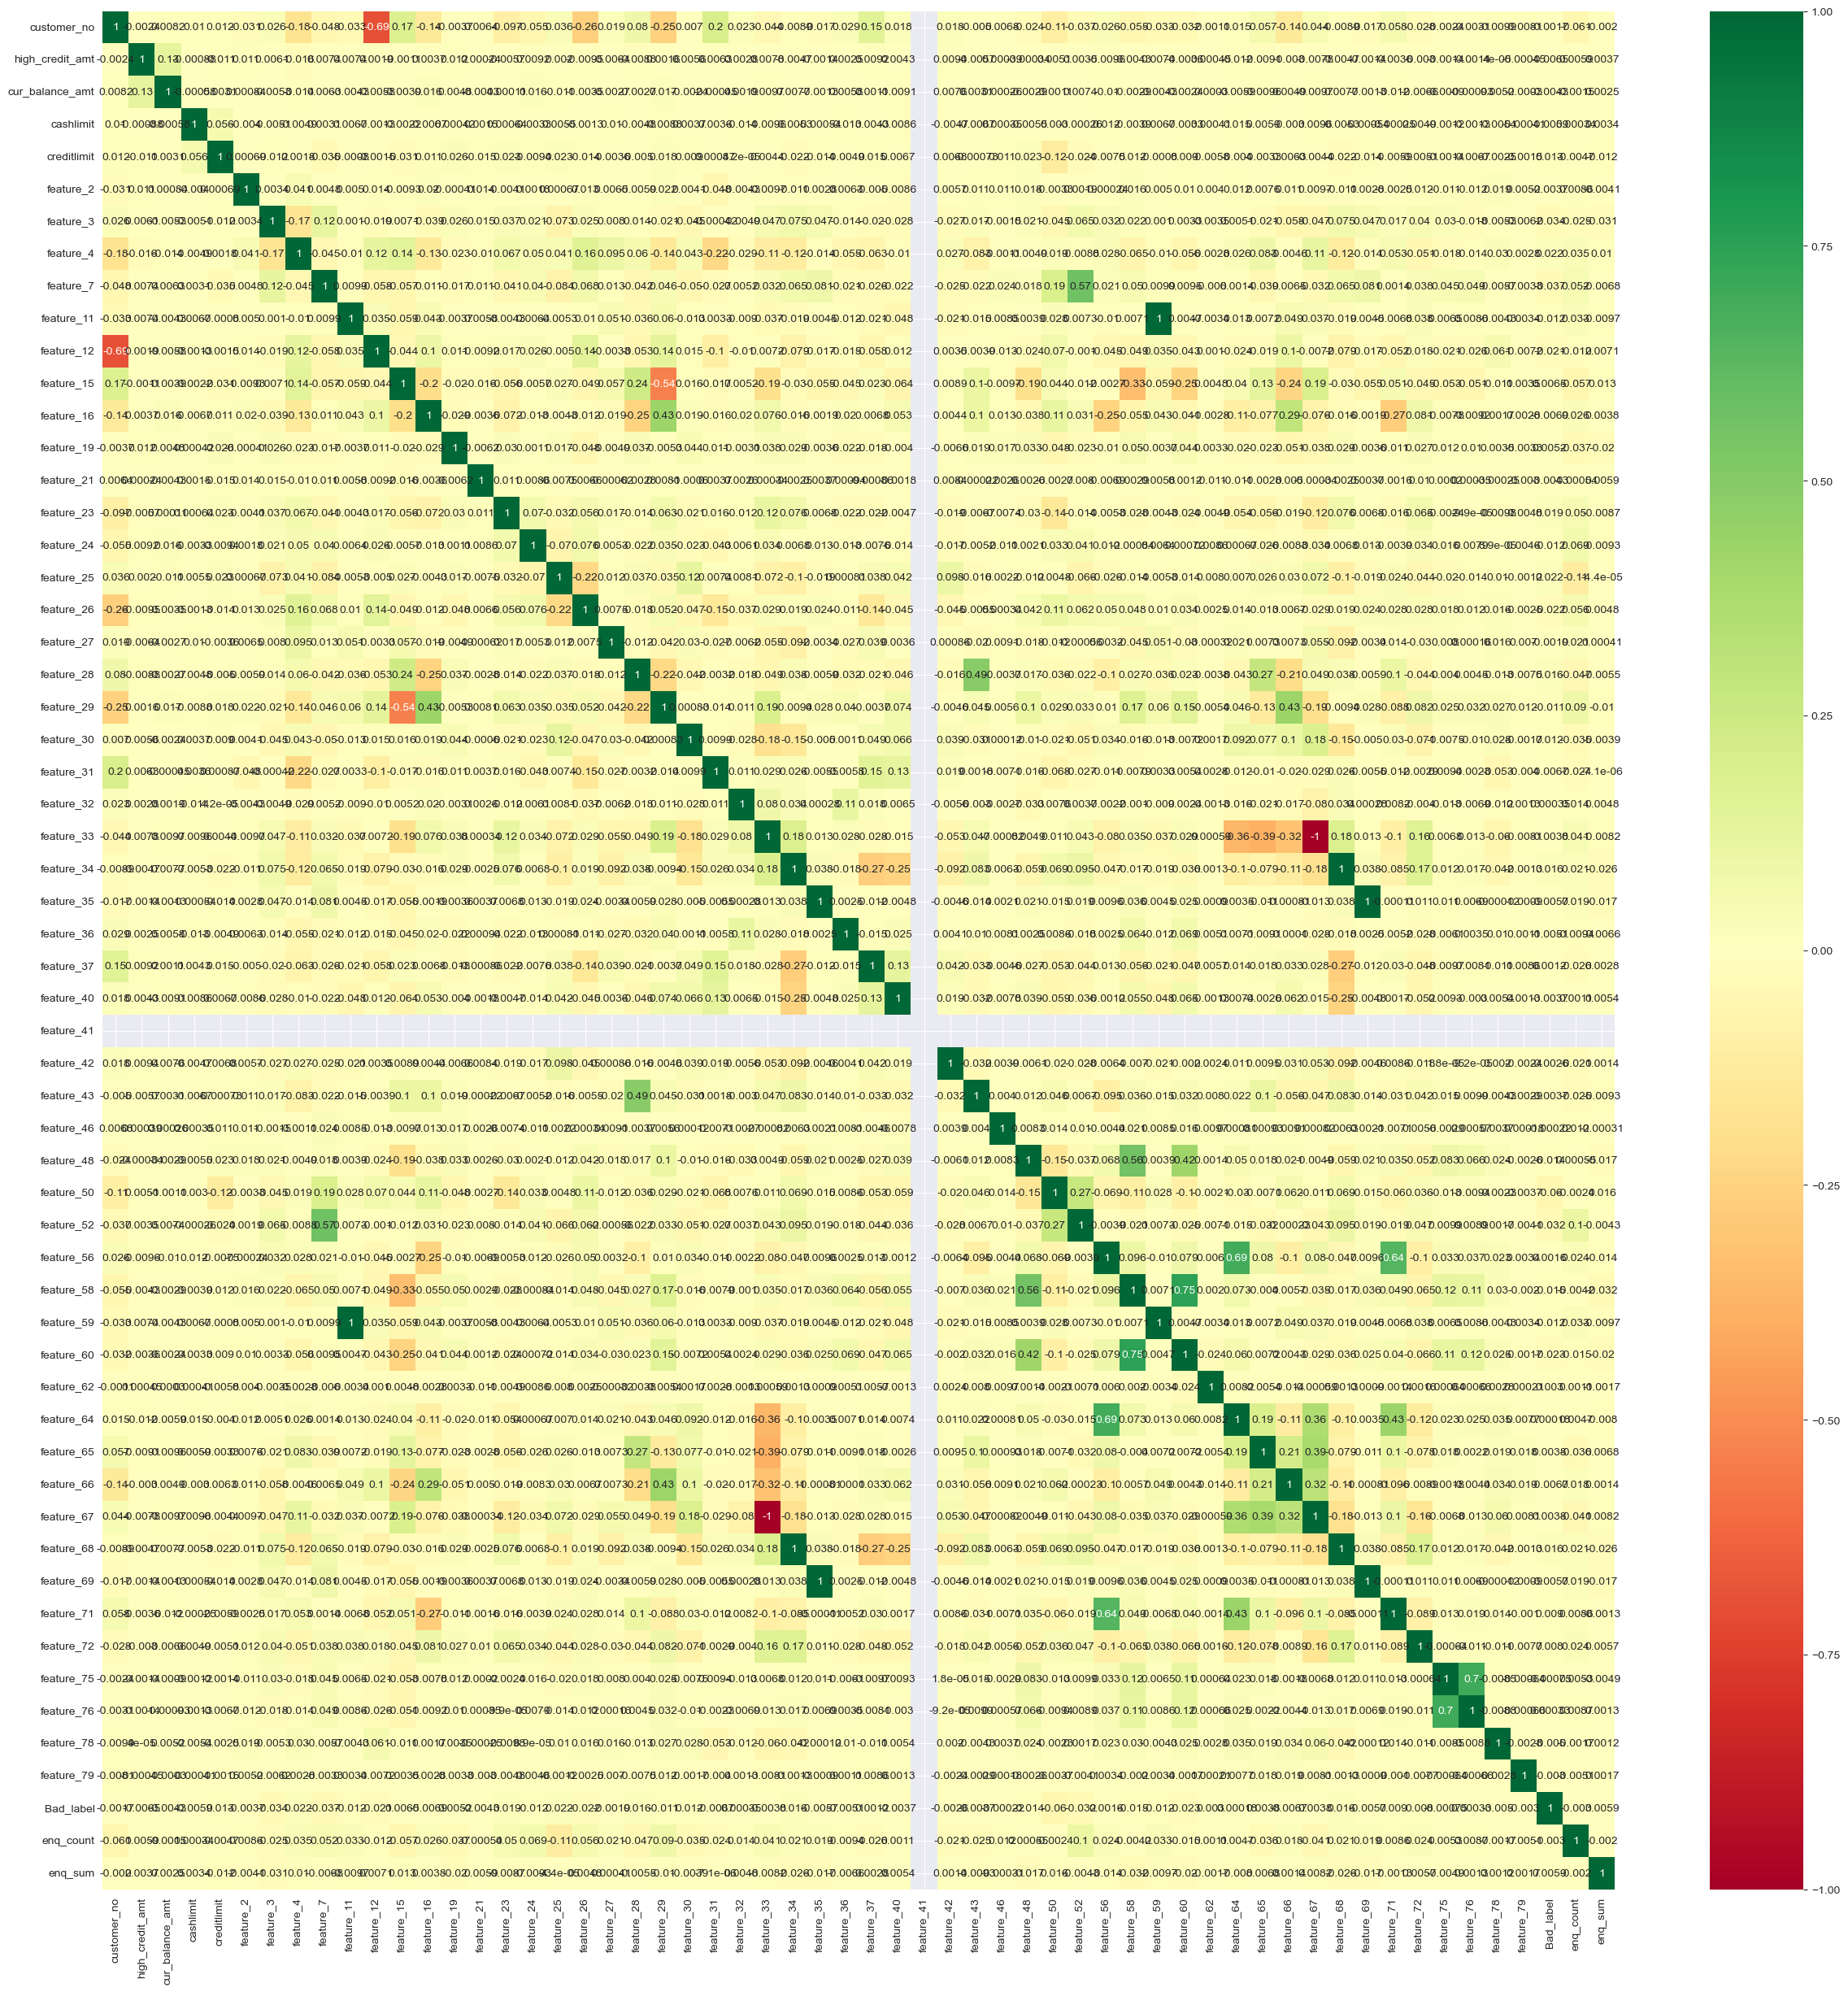

In [75]:
plt.figure(figsize=(30,30))
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn')
plt.show()

In [76]:
 #To get highly corelated feature
pd.set_option('display.max_rows',None)
corrmat = data.corr()
corrmat = corrmat.abs().unstack()
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat [corrmat >= 0.9] # Set threshold 0.9
corrmat = corrmat [corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1','feature2','corr']
corrmat

Empty DataFrame
Columns: [feature1, feature2, corr]
Index: []

##### Now we can confirm that there is no highly correlated features present.

## Checking Duplicates 

In [77]:
data.duplicated().sum()
#There are no Duplicates present in data.

0

In [79]:
# Split data into train and test
from sklearn.model_selection import train_test_split

In [80]:
# drop traget columns for x variable
# select target variable for y variable
x=data.drop('Bad_label',axis=1)
y=data.Bad_label	         

In [81]:
# split train and test data for model training and testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(19116, 57)
(4780, 57)
(19116,)
(4780,)


# Model Building

# 1)Logistic Legression

In [82]:
from sklearn.feature_selection import SelectKBest,f_classif
k=17
selector=SelectKBest(f_classif,k=k)
x_train_selected=selector.fit_transform(x_train,y_train)
x_test_selected=selector.transform(x_test)

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score,classification_report,confusion_matrix
# Assuming your_array in your numpy array
X=x_train_selected[:,:-1]
Y=x_train_selected[:,-1]

#sPlit  the data into training and testing sets
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

model1=LogisticRegression()
model1.fit(X_train_scaled,Y_train)

# make prediction on the test set
Y_test_LR=model1.predict(X_test_scaled)
Y_train_LR=model1.predict(X_train_scaled)

## Model Evaluation

In [84]:
# make prediction on train set
print("Confusion matrix:")
print(confusion_matrix(Y_train_LR,Y_train))

print("\nClassification Report:")
print(classification_report(Y_train_LR, Y_train))

print("\nAccuracy Score:")
print(accuracy_score(Y_train_LR, Y_train))

Confusion matrix:
[[11706     0     0]
 [    0  3559     0]
 [    0     0    27]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11706
           1       1.00      1.00      1.00      3559
           2       1.00      1.00      1.00        27

    accuracy                           1.00     15292
   macro avg       1.00      1.00      1.00     15292
weighted avg       1.00      1.00      1.00     15292


Accuracy Score:
1.0


In [86]:
# make prediction on test set
print("Confusion matrix:")
print(confusion_matrix(Y_test_LR,Y_test))

print("\nClassification Report:")
print(classification_report(Y_test_LR, Y_test))

print("\nAccuracy Score:")
print(accuracy_score(Y_test_LR, Y_test))

Confusion matrix:
[[2892    0    0]
 [   0  929    0]
 [   0    0    3]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2892
           1       1.00      1.00      1.00       929
           2       1.00      1.00      1.00         3

    accuracy                           1.00      3824
   macro avg       1.00      1.00      1.00      3824
weighted avg       1.00      1.00      1.00      3824


Accuracy Score:
1.0


# 2) Decision Tree

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score

# Assuming your_array in your numpy array
X=x_train_selected[:,:-1]
Y=x_train_selected[:,-1]

#sPlit  the data into training and testing sets
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

model2=DecisionTreeClassifier()
model2.fit(X_train_scaled,Y_train)

# make prediction on the test set
Y_test_tree=model2.predict(X_test_scaled)
Y_train_tree=model2.predict(X_train_scaled)

In [87]:
# make prediction on test set
print("Confusion matrix:")
print(confusion_matrix(Y_test_tree,Y_test))

print("\nClassification Report:")
print(classification_report(Y_test_tree, Y_test))

print("\nAccuracy Score:")
print(accuracy_score(Y_test_tree, Y_test))

Confusion matrix:
[[2892    0    0]
 [   0  929    0]
 [   0    0    3]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2892
           1       1.00      1.00      1.00       929
           2       1.00      1.00      1.00         3

    accuracy                           1.00      3824
   macro avg       1.00      1.00      1.00      3824
weighted avg       1.00      1.00      1.00      3824


Accuracy Score:
1.0


In [88]:
# make prediction on train set
print("Confusion matrix:")
print(confusion_matrix(Y_train_tree,Y_train))

print("\nClassification Report:")
print(classification_report(Y_train_tree, Y_train))

print("\nAccuracy Score:")
print(accuracy_score(Y_train_tree, Y_train))

Confusion matrix:
[[11706     0     0]
 [    0  3559     0]
 [    0     0    27]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11706
           1       1.00      1.00      1.00      3559
           2       1.00      1.00      1.00        27

    accuracy                           1.00     15292
   macro avg       1.00      1.00      1.00     15292
weighted avg       1.00      1.00      1.00     15292


Accuracy Score:
1.0


# Knn- K Nearest Neighbours

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score

# Assuming your_array in your numpy array
X=x_train_selected[:,:-1]
Y=x_train_selected[:,-1]


# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

model4=KNeighborsClassifier()
model4.fit(X_train_scaled,Y_train)

# make prediction on the test set
Y_test_Knn=model4.predict(X_test_scaled)
Y_train_Knn=model4.predict(X_train_scaled)

In [90]:
# make prediction on test set
print("Confusion matrix:")
print(confusion_matrix(Y_test_Knn,Y_test))

print("\nClassification Report:")
print(classification_report(Y_test_Knn, Y_test))

print("\nAccuracy Score:")
KNN=accuracy_score(Y_test_Knn, Y_test)
print(KNN)

Confusion matrix:
[[2892   20    0]
 [   0  909    3]
 [   0    0    0]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2912
           1       0.98      1.00      0.99       912
           2       0.00      0.00      0.00         0

    accuracy                           0.99      3824
   macro avg       0.66      0.66      0.66      3824
weighted avg       0.99      0.99      0.99      3824


Accuracy Score:
0.9939853556485355


In [91]:
# make prediction on train set
print("Confusion matrix:")
print(confusion_matrix(Y_train_Knn,Y_train))

print("\nClassification Report:")
print(classification_report(Y_train_Knn, Y_train))

print("\nAccuracy Score:")
print(accuracy_score(Y_train_Knn, Y_train))

Confusion matrix:
[[11699    20     0]
 [    7  3539    26]
 [    0     0     1]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11719
           1       0.99      0.99      0.99      3572
           2       0.04      1.00      0.07         1

    accuracy                           1.00     15292
   macro avg       0.68      1.00      0.69     15292
weighted avg       1.00      1.00      1.00     15292


Accuracy Score:
0.996534135495684


# Gradient Boosting

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score,classification_report

# Assuming your_array in your numpy array
X=x_train_selected[:,:-1]
Y=x_train_selected[:,-1]

#sPlit  the data into training and testing sets
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

model4=GradientBoostingClassifier()
model4.fit(X_train_scaled,Y_train)

# make prediction on the test set
Y_test_GR=model4.predict(X_test_scaled)
Y_train_GR=model4.predict(X_train_scaled)

In [93]:
# make prediction on test set
print("Confusion matrix:")
print(confusion_matrix(Y_test_GR,Y_test))

print("\nClassification Report:")
print(classification_report(Y_test_GR,Y_test))

print("\nAccuracy Score:")
GD=accuracy_score(Y_test_GR,Y_test)
print(GD)

Confusion matrix:
[[2892    0    0]
 [   0  929    0]
 [   0    0    3]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2892
           1       1.00      1.00      1.00       929
           2       1.00      1.00      1.00         3

    accuracy                           1.00      3824
   macro avg       1.00      1.00      1.00      3824
weighted avg       1.00      1.00      1.00      3824


Accuracy Score:
1.0


In [94]:
# make prediction on train set
print("Confusion matrix:")
print(confusion_matrix(Y_train_GR,Y_train))

print("\nClassification Report:")
print(classification_report(Y_train_GR, Y_train))

print("\nAccuracy Score:")
print(accuracy_score(Y_train_GR, Y_train))

Confusion matrix:
[[11706     0     0]
 [    0  3559     0]
 [    0     0    27]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11706
           1       1.00      1.00      1.00      3559
           2       1.00      1.00      1.00        27

    accuracy                           1.00     15292
   macro avg       1.00      1.00      1.00     15292
weighted avg       1.00      1.00      1.00     15292


Accuracy Score:
1.0


## **Model Comparison and Selection**

In this project, four different machine learning models were evaluated to determine the most effective model for classifying the data. Below is a detailed summary of the performance metrics for each model:

1. Logistic Regression:
   - **Training Accuracy**: 1.0
   - **Testing Accuracy**: 1.0
   - **Confusion Matrix**: The model achieved perfect classification across all classes.
   - **Precision, Recall, F1-Score**: All metrics showed optimal performance with values of 1.0 across the board, indicating the model's ability to classify all instances accurately without error.

2. Decision Tree:
   - **Training Accuracy**: 1.0
   - **Testing Accuracy**: 1.0
   - **Confusion Matrix**: The Decision Tree model also demonstrated perfect classification for all classes in both training and testing datasets.
   - **Precision, Recall, F1-Score**: All evaluation metrics were perfect (1.0), suggesting that the model is highly reliable for classification tasks in this context.

3. K-Nearest Neighbors (KNN):
   - **Training Accuracy**: 1.0
   - **Testing Accuracy**: 0.99399
   - **Confusion Matrix**: While the model performed well on the majority of classes, it showed issues with class `2` in the test set, where all instances were misclassified (all values in the confusion matrix for class `2` were 0).
   - **Precision, Recall, F1-Score**: The model demonstrated high precision and recall for classes `0` and `1`. However, its performance for class `2` was significantly poor, as seen in the classification report.

4. Gradient Boosting:
   - **Training Accuracy**: 1.0
   - **Testing Accuracy**: 1.0
   - **Confusion Matrix**: Like the Logistic Regression and Decision Tree models, Gradient Boosting achieved perfect classification across all classes.
   - **Precision, Recall, F1-Score**: All metrics were perfect (1.0), indicating excellent overall performance without any misclassifications.

## Conclusion and Best Model Selection:

All models achieved perfect accuracy on the training dataset, but there were differences in their performance on the test dataset. While **Logistic Regression**, **Decision Tree**, and **Gradient Boosting** exhibited flawless performance with 1.0 accuracy, **KNN** showed a slight decline in test accuracy and struggled with class `2`.

Given the results, **Gradient Boosting** is the most reliable and robust model for this classification task. It performed exceptionally well across both the training and testing datasets, with no misclassifications. Furthermore, Gradient Boosting is known for its strong performance in complex datasets, making it the preferred choice for deployment.